In [268]:
import pandas as pd

In [269]:
n = int(input("INPUT n : "))
path_to_text = input("Path to text.csv : ")

INPUT n : 68
Path to text.csv : ~/t.csv


In [270]:
m = int(input("INPUT m : "))
path_to_abstract = input("Path to abstract.csv")

INPUT m : 68
Path to abstract.csv~/a.csv


In [271]:
abstract = pd.read_csv(path_to_abstract,header=None)
text = pd.read_csv(path_to_text,header=None)
abstract

,0
0,A relatively recent advance in cognitive neuro...
1,Abstract—Multi-step-ahead time series predicti...
2,Addressing the issue of SVMs parameters optimi...
3,Long Short-Term Memory (LSTM) is a recurrent n...
4,"In this paper, we propose a novel neu- ral net..."
5,Deep neural networks (DNNs) are now a central ...
6,Neural machine translation is a recently propo...
7,"The authors of (Cho et al., a) have shown that..."
8,Abstract. We propose a simple neural network m...
9,Many of the current state-of-the-art Large Voc...


In [272]:
abstract.dropna(inplace=True)

In [273]:
text.dropna(inplace=True)

In [274]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/susiejojo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/susiejojo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [275]:
abs_val = abstract.values
text_val = text.values

In [428]:
for text_values_array in [text_val]:
    for i in range(text.shape[0]):
        topic_generator(str(text_values_array[i][0]),abs_val)
        break     

(0, '0.040*"öztekin" + 0.021*"participant" + 0.021*"animal" + 0.021*"mcelree"')
(1, '0.046*"performance" + 0.035*"parameter" + 0.024*"feature" + 0.024*"classifier"')
(2, '0.030*"voxel" + 0.030*"pattern" + 0.025*"measure" + 0.025*"brain"')
(3, '0.029*"semantic" + 0.029*"intensity" + 0.029*"category" + 0.029*"analysis"')
(4, '0.032*"classifier" + 0.022*"estimate" + 0.022*"weight" + 0.022*"vector"')
[(0, 8), (1, 3), (2, 42), (3, 3), (4, 12), (5, 13), (6, 4), (7, 6), (8, 20), (9, 29), (10, 11), (11, 22), (12, 7), (13, 4), (14, 26), (15, 15), (16, 24), (17, 21), (18, 31), (19, 3), (20, 10), (21, 5), (22, 1), (23, 31), (24, 4), (25, 6), (26, 25), (27, 4), (28, 62), (29, 5), (30, 6), (31, 5), (32, 3), (33, 1), (34, 33), (35, 16), (36, 6), (37, 2), (38, 6), (39, 4), (40, 1), (41, 19), (42, 26), (43, 19), (44, 17), (45, 1), (46, 5), (47, 1), (48, 1), (49, 1), (50, 26), (51, 15), (52, 1), (53, 1), (54, 9), (55, 2), (56, 5), (57, 3), (58, 8), (59, 15), (60, 4), (61, 9), (62, 6), (63, 16), (64, 2)

In [186]:

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [173]:

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    

def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [426]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [315]:
for text_values_array in [abs_val]:
#     topic_generator(text_values_array,abs_val)
    import random
    text_data = []   
    print (str(text_values_array[0][0]))

A relatively recent advance in cognitive neuroscience has been multi-voxel pattern analysis (MVPA), which enables researchers to decode brain states and/or the type of information represented in the brain during a cognitive operation. MVPA methods utilize machine learning algorithms to distinguish among types of information or cognitive states represented in the brain, based on distributed patterns of neural activity. In the current investigation, we propose a new approach for representation of neural data for pattern analysis, namely a Mesh Learning Model. In this approach, at each time instant, a star mesh is formed around each voxel, such that the voxel corresponding to the center node is surrounded by its p-nearest neighbors. The arc weights of each mesh are estimated from the voxel intensity values by least squares method. The estimated arc weights of all the meshes, called Mesh Arc Descriptors (MADs), are then used to train a classifier, such as Neural Networks, k-Nearest Neighbo

In [314]:
print(len(txt_list))

NameError: name 'txt_list' is not defined

In [416]:
def topic_generator(txt,j_big):
    import random
    text_data = [] 
    txt_list = txt.split(".")
    var_size=1-40/len(txt_list)
#     print (txt_list[0:5])
# #     print(txt)
    for i in txt_list:
        tokens = prepare_text_for_lda(i)
        #     print(tokens)
        if random.random() > var_size:
        #print(tokens)
            text_data.append(tokens)
        #     print(text_data)
    from gensim import corpora
    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    import pickle
    pickle.dump(corpus, open('corpus.pkl', 'wb'))
    dictionary.save('dictionary.gensim')
    import gensim
    NUM_TOPICS = 5
    #     print (corpus)
    #     print (dictionary)
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    ldamodel.save('model5.gensim')
    topics = ldamodel.print_topics(num_words=4)
    for topic in topics:
        print(topic)
    new_doc = txt    
    new_doc = prepare_text_for_lda(new_doc)
    new_doc_bow = dictionary.doc2bow(new_doc)
    print(new_doc_bow)
    list_mod=ldamodel.get_document_topics(new_doc_bow)
    list_mod=bal_zero(list_mod,NUM_TOPICS)
    print(list_mod)
    list_mod_txt=list_mod
    print("****************************************************************************")
    list_mod_abs=[]
    for j in [j_big]:
        sum_list = []
        for k in range(abstract.shape[0]):   
#             print (j[k][0])
            new_doc = j[k][0]    
            new_doc = prepare_text_for_lda(new_doc)
            new_doc_bow = dictionary.doc2bow(new_doc)
            #print(new_doc_bow)
            var4=[]
            list_mod=ldamodel.get_document_topics(new_doc_bow)
            list_mod=bal_zero(list_mod,NUM_TOPICS)
            print(list_mod)
            list_mod_abs.append(list_mod)
            sum = 0
            for i in range(len(list_mod)):
                #print(">>>>>>>>>>>>><<<<<<<<<<<<<<<")
                #print(list_mod[i][1] * list_mod_txt[i][1])
                sum += list_mod[i][1] * list_mod_txt[i][1]
            #print("iuiuiuiuiuiu")
            #print(sum)
            sum_list.append(sum)
      
        #max_list=max(sum_list)
        #min_list=min(sum_list)
        
        #for i in range(len(sum_list)):
         #   sum_list[i] = (sum_list[i] - min_list) / (max_list - min_list)
            
        print(">>>>>>>>>>>>>>>>>SUM LIST<<<<<<<<<<<<")
        print(sum_list) 
        
        print("max of list : ")
        print(max(sum_list))
        print("min")
        print(min(sum_list))
        
        print("")
            
        print("softmax list><><><><><><><><><><><><><>")
        print(softmax(sum_list))
    print(list_mod_abs)
            #print("after function")
            
# #             for i in var3:
# #                 var4.append(i[1])
#             print(var4)

In [364]:
def bal_zero(list_mod,no_of_topics):
    temp_list=[]
    for i in list_mod:
        temp_list.append(i[0])
    for i in range(no_of_topics):
        if i not in temp_list:
            list_mod.append((i,0))
    return list_mod 

In [103]:
# from gensim import corpora
# dictionary = corpora.Dictionary(text_data)
# corpus = [dictionary.doc2bow(text) for text in text_data]
# import pickle
# pickle.dump(corpus, open('corpus.pkl', 'wb'))
# dictionary.save('dictionary.gensim')

In [104]:
# import gensim
# NUM_TOPICS = 5
# ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
# ldamodel.save('model5.gensim')
# topics = ldamodel.print_topics(num_words=4)
# for topic in topics:
#     print(topic)

(0, '0.125*"neural" + 0.125*"damasio" + 0.125*"recognition" + 0.125*"category"')
(1, '0.140*"collect" + 0.140*"visualization" + 0.140*"resolution" + 0.140*"t1-weighted"')
(2, '0.077*"image" + 0.077*"anatomical" + 0.077*"t1-weighted" + 0.077*"visualization"')
(3, '0.077*"anatomical" + 0.077*"resolution" + 0.077*"image" + 0.077*"t1-weighted"')
(4, '0.077*"image" + 0.077*"visualization" + 0.077*"anatomical" + 0.077*"resolution"')


In [105]:
new_doc = "Innovation in Database Management: Computer Science vs. Engineering.\nHigh performance prime field multiplication for GPU.\nenchanted scissors: a scissor interface for support in cutting and interactive fabrication.\nDetection of channel degradation attack by Intermediary Node in Linear Networks.\nPinning a Complex Network through the Betweenness Centrality Strategy.\nAnalysis and Design of Memoryless Interconnect Encoding Scheme.\nDynamic bluescreens.\nA Quantitative Assured Forwarding Service.\nAutomatic sanitization of social network data to prevent inference attacks.\nA &#916;&#931; IR-UWB radar with sub-mm ranging capability for human body monitoring systems.\nArchitecture of a multi-slot main memory system for 3.2 Gbps operation.\nRule-based Service Customization via Houdini.\nBusiness Policy Modeling and Enforcement in Databases.\nA high speed and high linearity OTA in 1-V power supply voltage.\nPREDIcT: Towards Predicting the Runtime of Large Scale Iterative Analytics.\nSocialSensor: sensing user generated input for improved media discovery and experience.\nParametric keyframe interpolation incorporating kinetic adjustment and phrasing control.\nAn Explanation for Unexpected 802.11 Outdoor Link-level Measurement Results.\nHot Block Clustering for Disk Arrays with Dynamic Striping.\nAnalysis of propagation delay in 3 - D stacked DRAM.\nISHair: importance sampling for hair scattering.\nGreen Wave: Latency and Capacity-Efficient Sleep Scheduling for Wireless Networks.\nExploiting innocuous activity for correlating users across sites.\nOptimized numerical mapping scheme for filter-based exon location in DNA using a quasi-Newton algorithm.\nNyquist criterion based design of continuous time Sigma Delta modulators.\nFast Transient Simulation of Lossy Transmission Lines.\nImage sensor with focal plane polarization sensitivity.\nPower-oriented delay budgeting for combinational circuits.\nSensor Network Navigation without Locations.\nSimplified logic design methodology for fuzzy membership function based robust detection of maternal modulus maxima location: A low complexity Fetal ECG extraction architecture for mobile health monitoring systems.\nE-V: Efficient visual surveillance with electronic footprints.\nAnalysis of Price Competition in a Slotted Resource Allocation Game.\nA language for shading and lighting calculations.\nIntegration of Streaming and Elastic Traffic in Wireless Networks.\nMATE: MPLS Adaptive Traffic Engineering.\nSurround-screen projection-based virtual reality: the design and implementation of the CAVE.\nOutput Characteristics of Class E Amplifier With Nonlinear Shunt Capacitance Versus Supply Voltage.\nPredicting reflectance functions from complex surfaces.\nActionView: a Movement-analysis Ambulatory Monitor in Elderly Homecare Systems.\nLive demonstration: Packet-based AER with 3Gevent/s cumulative throughput.\nAdaptive electricity scheduling in microgrids.\nDesign of a 64-bit Low-energy High-performance Adder using Dynamic Feedthrough Logic.\nMinimax Design of IIR Digital Filters using SDP Relaxation Technique.\nPropagation and Reflection of Phase Differences on a Lattice of Coupled Oscillators.\nQuery Optimization in the Presence of Foreign Functions.\nParallelizing query optimization.\nOptimizing the Topology of Bluetooth Wireless Personal Area Networks.\nA Scalable Algorithm for Maximizing Range Sum in Spatial Databases.\nCoexistence and Transformation of Data.\nPower transfer networks at RF frequencies: new design procedures with implementation roadmap.\nA distributed amplifier based dispersive delay line.\nHigh-speed front end for LED-Photodiode based fluorescence lifetime measurement system.\nSimple sybil-proof mechanisms for multi-level marketing.\nRants: a framework for rank editing and sharing in web search.\nMobile search pattern evolution: the trend and the impact of voice queries.\nData summaries for on-demand queries over linked data.\nCompressive sampling of EMG bio-signals.\nAnthropocentric Data Systems.\nEstimating clustering coefficients and size of social networks via random walk.\nCALMS: Cloud-assisted live media streaming for globalized demands with time/region diversities.\nQuadrature generation techniques for frequency multiplication based oscillators.\nTopology design for fast convergence of network consensus algorithms.\nAnalysis of power supply gain of CMOS bandgap references.\nA Scalable Method for Access Control in Location-Based Broadcast Services.\nA novel Fisher discriminant for biometrics recognition: 2DPCA plus 2DFLD.\nA framework for benchmarking entity-annotation systems.\nA physically based approach to 2-D shape blending.\nEffects of the recession on public mood in the UK.\nGIO: a semantic web application using the information grid framework.\nMaximum likelihood disjunctive decomposition to reduced multirooted DAG for FIR filter design.\nSocioCrowd: a social-network-based framework for crowd simulation.\nA MATLAB based optimum multiband FIR filters design program following the original idea of the Remez multiple exchange algorithm.\nTouchy.Internet: a cybernetics system for human-pet interaction through the Internet.\nSocial status and role analysis of palin\'s email network.\nA fast hash tree generator for Merkle signature scheme.\nGPU Powered Artificial Immune System for Visual Applications.\nLinear combination of transformations.\n10GBase-LX4 Limiting Amplifier in 0.18 &micro;m CMOS Digital Process with Tunable Shunt-peaking.\nRandomization tests for distinguishing social influence and homophily effects.\nPricing algorithms for the day-ahead electricity market with flexible consumer participation.\n\"WS-CatalogNet: An Infrastructure for Creating, Peering, and Querying e-Catalog Communities.\"\nIntelligent ad resizing.\nA 4-Kb low power 4-T SRAM design with negative word-line gate drive.\nA memory-efficient continuous-flow FFT processor for Wimax application.\nStatistical Multiplexing Over DSL Networks.\nA Novel Quantitative Approach For Measuring Network Security.\nComparative analysis of contrast enhancement algorithms in surveillance imaging.\nFast video coding based on Gaussian model of DCT coefficients.\nNon-linear aperture for stylized depth of field.\n\"MegaMind: fire, smoke and data.\"\nSimulation of object and human skin formations in a grasping task.\nWireless integrated circuit for the acquisition of electrocorticogram signals.\nPrivacy nudges for social media: an exploratory Facebook study.\nSecure continuous aggregation via sampling-based verification in wireless sensor networks.\nOn rigorous integration of piece-wise linear continuous systems.\nVisibly pushdown automata for streaming XML.\nVideo Multicast in (Large) Local Area Networks.\nProcess-insensitive modulated-clock voltage comparator.\nAn Efficient Prony\'s Method for Time-varying Power System Harmonic Estimation.\nA novel CAVLC architecture for H.264 Video encoding at high bit-rate.\nTongue visualization for specified speech task.\nSmoother subsurface scattering.\nCore-Stateless Guaranteed Rate Scheduling Algorithms.\nA Novel Ray-space based Color Correction Algorithm for Multi-view Video.\nVisualizing tags over time.\nDriver\'s drowsiness estimation by combining EEG signal analysis and ICA-based fuzzy neural networks.\nTowards a programming language for services computing.\nPractical routing-layer support for scalable multihoming.\nMRsionCase: a glasses-free mixed reality showcase for surrounding multiple viewers.\nAn adaptive maximum power point tracker for maximising solar cell efficiency in wireless sensor nodes.\nAn All-digital Skew-adaptive Clock Scheduling Algorithm for Heterogeneous Multiprocessor Systems on Chips (MPSoCs).\n\"Interactive lighting of effects using point clouds in \"\"Bolt\"\".\"\nKeep your friends close: Incorporating trust into social network-based Sybil defenses.\nA Database Index to Large Biological Sequences.\nCsurf: a context-driven non-visual web-browser.\nRejecting the attack: Source authentication for Wi-Fi management frames using CSI Information.\nComputer-assisted animation of line and paint in Disney\'s <i>Paperman</i>.\nQoS Routing with Performance-Dependent Costs.\nA Concurrent Database Manipulation Problem: Binary Search Trees (Abstract).\nA reconfigurable MAC architecture implemented with mixed-Vt standard cell library.\nMEMS automotive collision avoidence radar beamformer.\nExecution time comparison of lifting-based 2D wavelet transforms implementations on a VLIW DSP.\nSPARQL basic graph pattern optimization using selectivity estimation.\nA wide-tuning quasi-type-I PLL with voltage-mode frequency acquisition aid.\nAnimating art history: building a bridge between disciplines.\nV-buffer: visible volume rendering.\nThe Magic of Duplicates and Aggregates.\nPersonalized pocket directories for mobile devices.\nRecord Subtype Facilities in Database Systems.\nIllumination in diverse codimensions.\nJoint optimal scheduling and routing for maximum network throughput.\nA CMOS high IIP2 mixer for multi-standard receivers.\nPartitioning and ordering large radiosity computations.\nGeneralized arbitrary resizing for video transcoding.\nOn the impact of global information on diffusion of innovations over social networks.\nAnalysis for Signal and Power Integrity Using the Multilayered Finite Difference Method.\nProbability Distribution of Blackouts in Complex Power Networks.\nWrite-Optimized B-Trees.\nCross-Regulation-Suppression control scheme for CCM Single-Inductor-Dual-Output buck converter with ordered-power-distributive control.\nA New 10 Gbps Traffic Management algorithm for High-speed Networks.\nBifurcations and chaos in electrostatic vibration energy harvesters.\nA proposal of a new blind equalizer using output signals of decision device.\nDistributed video coding using wavelet.\nUsing eye tracking to analyze stereoscopic filmmaking.\nPorqpine: A Distributed and Collaborative Search Engine.\nA time-domain gradient-detection architecture for VLSI analog motion sensors.\nHigh dynamic range imaging using coded electronic shutter.\nAutomated semantic web services orchestration via concept covering.\nIncremental Maintenance for Non-Distributive Aggregate Functions.\nA simple modeling of the early voltage of MOSFETs in weak and moderate inversion.\nTowards a Common Infrastructure to Support Heterogeneous Learning Experiences.\nPlurality: a context-aware personalized tagging system.\nRealistic and Efficient Multi-Channel Communications in Wireless Sensor Networks.\nLocalization in 3D surface sensor networks: Challenges and solutions.\nSAT-based ATPG for Path Delay Faults in Sequential Circuits.\nSpectrally optimal sampling for distribution ray tracing.\nCloudy: A Modular Cloud Storage System.\nDesign of OOK system for wireless capsule endoscopy.\nGesture-world technology: 3D hand pose estimation system for unspecified users using a compact high-speed camera.\nGeneralizations of Oja\'s Learning Rule to Non-Symmetric Matrices.\nContent-aware caching and traffic management in content distribution networks.\nFALCON: Feedback Adaptive Loop for Content-Based Retrieval.\nImage based flow visualization.\nEnergy-efficient collaborative sensing with mobile phones.\nWhat is the importance of selecting features for non-technical losses identification?\nPredictions and Challenges for Database Systems in the Year 2000.\nCoordination in network security games.\nEnabling entity-based aggregators for web 2.0 data.\nEnergy function based neural networks UPFC for transient stability enhancement of network-preserving power systems.\nReal-time simulation in the real world (panel session).\nSocial search and discovery using a unified approach.\nRun-Time Programming of Analog Circuits Using Floating-Gate Transistors.\nUser Interaction Experience for Semantic Web Information.\nA versatile I/O with robust impedance calibration for various memory interfaces.\nThe Integrated Microbial Genomes (IMG) System: A Case Study in Biological Data Management.\nThe Theory of Probabilistic Databases.\nDesign and optimization of two motion detection circuits for video monitoring system.\nRealistic and interactive image-based rendering of ancient chinese artifacts using a multiple camera array.\nRecovery and Coherency-Control Protocols for Fast Intersystem Page Transfer and Fine-Granularity Locking in a Shared Disks Transaction Environment.\nThe V*-Diagram: a query-dependent approach to moving KNN queries.\nDigital RF Processing Techniques for Device Mismatch Tolerant Transmitters in Nanometer-Scale CMOS.\nCooperative Network Coding-Aware Routing for Multi-Rate Wireless Networks.\nA logical framework for temporal deductive databases.\nManage and Query Generic Moving Objects in SECONDO.\nHow to reach 100% coding efficiency in multilevel burst-mode RF transmitters.\nFast Reconfiguration Experiments of an Optically Differential Reconfigurable Gate Array with Nine Configuration Contexts.\nTowards a comprehensive and systematic classification of hardware Trojans.\nAn inductively tuned CMOS astable multivibrator.\n\"dRig: an artist-friendly, object-oriented approach to rig building.\"\nThe web beyond popularity: a really simple system for web scale RSS.\nA CMOS linear voltage/current dual-mode imager.\nModel and Architecture of a Timing Service for Adaptive Policy-Based Management Systems.\nFrequency Response Masking based Reconfigurable Channel Filters for Software Radio Receivers.\nPartitioning and synthesis for hybrid architecture simulators.\nA parallel search algorithm for CLNS addition optimization.\nInstrumenting a logic programming language to gather provenance from an information extraction application.\nSMOOTH - A Distributed Multimedia Database System.\nLoop mitigation in bloom filter based multicast: A destination-oriented approach.\nInfluence of external input on Oscillatory Cellular Nonlinear Networks dynamics.\nEfficient design of sparse FIR filters in WLS sense.\nA metro map metaphor for guided tours on the Web: the Webvise guided tour system.\nGPX: Interactive Mining of Gene Expression Data.\n\"Video sharing propagation in social networks: Measurement, modeling, and analysis.\"\nVariable fractional delay FIR filters with sparse coefficients.\nHexahedral Mesh Re-parameterization from Aligned Base Domains\nThe largest scholarly semantic network...ever.\niPvlc: pixel-level visible light communication for smart mobile devices.\nNew FPN correction method for PD-storage dual-capture CMOS image sensor using a nonfully depleted pinned photodiode.\nDissemination of Models over Time-Varying Data.\nApplication of two-layered tabu search to optimal allocation of UPFC for maximizing transmission capability.\nEnhancing Traffic Sampling scope and efficiency.\nLow phase noise on-chip oscillator for implantable biomedical applications.\nCodePipe: An opportunistic feeding and routing protocol for reliable multicast with pipelined network coding.\nOn Hybrid Collision Control for IEEE 802.11 Ad-Hoc Networks.\nChallenges and recent advances in IR-UWB system design.\nShape transformation for polyhedral objects.\nA flexible generative model for preference aggregation.\nCharacterizing geospatial dynamics of application usage in a 3G cellular data network.\nNoise Reduction System Based on LPEF and System Identification with Variable Step Size.\nA full-custom design of AES SubByte module with signal independent power consumption.\nA time-efficient information collection protocol for large-scale RFID systems.\n2-MITE Product-of-Power-Law Networks.\nFiltering with Approximate Predicates.\nEstimating the prevalence of deception in online review communities.\nBounding the power rate function of wireless ad hoc networks.\nData Broadcasting and Seamless Channel Transition for Highly-Demanded Videos.\nMMSE-based design of scaled and offset BP-based decoding algorithms on the fast Rayleigh fading channel.\nNews in the age of the web.\nPolygon-assisted JPEG and MPEG compression of synthetic images.\nUnsupervised query segmentation using click data: preliminary results.\nModeling and understanding TCP incast in data center networks.\nA Low Jitter CMOS PLL Clock Synthesizer with 20-400 MHz Locking Range.\nBSSRDF importance sampling.\nExtraction of robust visual phrases using graph mining for image retrieval.\nA Singlehop Collaborative Feedback Primitive for Wireless Sensor Networks.\nHighly parallel image coding for many cores.\nProtocol-level performance analysis for anti-collision protocols in RFID systems.\nDistance Indexing on Road Networks.\nReconfigurable cell array for concurrent support of multiple radio standards by flexible mapping.\nCreating Competitive Products.\nSensory design for virtual environments.\nOptimal Bandwidth Reservation in Hose-Model VPNs with Multi-Path Routing.\nOptimal Waveband Switching in Optical Ring Networks.\nExploiting channel memory for joint estimation and scheduling in downlink networks.\nMultiuser detection based on Grover\'s algorithm.\nImpact of File Arrivals and Departures on Buffer Sizing in Core Routers.\nTowards a theory model for product search.\nFourier series analysis of the nonlinearities in analog closed-loop PWM class D amplifiers.\nData fusion - Resolving Data Conflicts for Integration.\nArgus: End-to-end service anomaly detection and localization from an ISP\'s point of view.\nSignal modulus design for blind source separation via algebraic known modulus algorithm: A perturbation perspective.\nSmall-World File-Sharing Communities.\nLocal Disk Caching for Client-Server Database Systems.\nA novel polynomial selection scheme for low-complexity chase algebraic soft-decision reed-solomon decoding.\nAutonomous resource provisioning for multi-service web applications.\nAn improved soft BCH decoder with one extra error compensation.\nRouting in Overlay Multicast Networks.\nA Ku-band down-converter with perfect differential PLL in 0.18um CMOS.\nThe Design of Symmetric Square-Root Pulse-Shaping Filters for Transmitters and Receivers.\nDesign of concurrent multi-band matching networks.\nJust the right amount: extracting modules from ontologies.\nDistributed Querying of Internet Distance Information.\nNon-causal error control for wireless video streaming with noncoherent signaling.\nSteel life.\nA simulation of pearl optical phenomena for cosmetic preproduction.\n\"The gRNA: A Highly Programmable Infrastructure for Prototyping, Developing and Deploying Genomics-Centric Applications.\"\nFoundations of Uncertain-Data Integration.\nProgressive lossless compression of arbitrary simplicial complexes.\nPotter\'s Wheel: An Interactive Data Cleaning System.\nRevisiting the Absolutely Minimal Realization for Two-dimensional Digital Filters.\nAutomated synthesis of executable web service compositions from BPEL4WS processes.\nOnline Dynamic Reordering for Interactive Data Processing.\nAn Efficient Implementation of a Relational Data Base.\nA Buyers Integration Support System based on Users\' Multi Attribute Utilities for Internet Group Buying.\nMaking use of social media data in public health.\nDesigning efficient DSP datapaths through compiler-in-the-loop exploration methodology.\nOn Integrating Fluid Models with Packet Simulation.\nData versioning techniques for internet transaction management.\nTapered-VTH CMOS buffer design for improved energy efficiency in deep nanometer technology.\nDistributed Power Control For Cellular Networks In the Presence of Rayleigh Fading Channel.\nAutonomous lighting agents in global illumination.\nSearching Large Lexicons for Partially Specified Terms using Compressed Inverted Files.\nThe ScratchPad: sensemaking support for the web.\nAccurate web recommendations based on profile-specific url-predictor neural networks.\nTree Pattern Aggregation for Scalable XML Data Dissemination.\nTowards a Deeper Understanding of Link Restoration Algorithms for Mesh Networks.\nAn eye detection technique for clock and data recovery applications.\nComparison of time and frequency domain interpolation implementations for MB-OFDM UWB transmitters.\nTuning parameters of the expected reciprocal rank.\n\"Prevention of Deadlocks and Livelocks in Lossless, Backpressured Packet Networks.\"\nStable but responsive cloth.\nA service creation environment based on end to end composition of Web services.\nA pMOS-based double-ladder integrated charge pump for standard process.\nAn alias-locked loop frequency synthesis architecture.\n\"Industrial Panel on Data Warehousing Technologies: Experiences, Challenges, and Directions.\"\nThe SAGE graphics architecture.\nTemporal Management of RFID Data.\nA new four-modulus RNS to binary converter.\nVoteTrust: Leveraging friend invitation graph to defend against social network Sybils.\nFast computation of shadow boundaries using spatial coherence and backprojections.\nA Converter with Fixed Switching Frequency Adaptive Multi-Mode Control Scheme.\nQuality of Field Reconstruction in Sensor Networks.\n\"Interactions, Competition and Innovation in a Service-Oriented Internet: An Economic Model.\"\nAn asynchronous spike event coding scheme for programmable analog arrays.\nCerFix: A System for Cleaning Data with Certain Fixes.\nOptimization for packet routing using chaotic dynamics.\nReducing spurious PLL tones in spectrum sensing architectures.\nA piezoelectric actuator driver circuit for automatic focusing of mobile phone cameras.\n\"Set Containment Joins: The Good, The Bad and The Ugly.\"\nPixelFlow: high-speed rendering using image composition.\nThermal aware clock synthesis considering stochastic variation and correlations.\nRewriting XPath Queries Using Materialized Views.\nEffective multi-standard macroblock prediction VLSI design for reconfigurable multimedia systems.\nLow-voltage CMOS syllabic-companding log domain filter.\nThe Unified Logging Infrastructure for Data Analytics at Twitter.\nThe Case for Non-Cooperative Multihoming of Users to Access Points in IEEE 802.11 WLANs.\nP<sup>2</sup>E-DWT: A parallel and pipelined efficient VLSI architecture of 2-D Discrete Wavelet Transform.\nZF-DFE transceiver for time-varying MIMO channels with channel-independent temporal precoder.\nRecord Linkage with Uniqueness Constraints and Erroneous Values.\nSocially-Aware Network Design Games.\nUWB LNAs for Ground Penetrating Radar.\nAnalysis of a Packet Switch with Memories Running at Slower than the Line Rate.\nDesign and modeling of on-chip monolithic transformers with patterned ground shield.\nA dynamic latched comparator for low supply voltages down to 0.45 V in 65-nm CMOS.\nTexture synthesis over arbitrary manifold surfaces.\nGeneric sensing hardware and real-time reconstruction for structured analog signals.\n\"Fast Similarity Search in the Presence of Noise, Scaling, and Translation in Time-Series Databases.\"\nThe Design of GridDB: A Data-Centric Overlay for the Scientific Grid.\nAn Experiment in Dedicated Data Management.\nMulti-strategy object tracking in complex situation for video surveillance.\nAcquisition of large-scale surface light fields.\nTowards a highly-scalable and effective metasearch engine.\nA Wide Dynamic Range High Linearity In-pixel Data Acquisition Front-end for Computed Tomography.\nA Performance Study of Workfile Disk Management for Concurrent Mergesorts in a Multiprocessor Database System.\nWarmth through the night.\nFighting the bufferbloat: On the coexistence of AQM and low priority congestion control.\nExtracting Large-Scale Knowledge Bases from the Web.\nTELESAR V: TELExistence surrogate anthropomorphic robot.\nOntoWiki mobile: knowledge management in your pocket.\nFine-grained privilege separation for web applications.\nOptimality and Scalability in Lattice Histogram Construction.\nDetection of on-chip temperature gradient using a 1.5V low power CMOS temperature sensor.\nInspector Joins.\nThe utility of tweeted URLs for web search.\nMany-to-Many Communication: A New Approach for Collaboration in MANETs.\nFeature-based cellular texturing for architectural models.\nMassive Stochastic Testing of SQL.\n\"Artificial fishes: physics, locomotion, perception, behavior.\"\nSmoothing polyhedra using implicit algebraic splines.\nAn Evaluation on Using Preference Clustering in Large-Scale Multicast Applications.\n\"Optimization method for the joint allocation of modulation schemes, coding rates, resource blocks and power in self-organizing LTE networks.\"\nCASIS: a system for concept-aware social image search.\nSemantic similarity between search engine queries using temporal correlation.\nAn FPGA-based point target detection system using morphological clutter elimination.\nWhy is 3-D interaction so hard and what can we really do about it?\nA high performance pseudo-multi-core ECC processor over GF(2<sup>163</sup>).\nLocating sensors in the forest: A case study in GreenOrbs.\nFlash finally hits the big screen.\nSHARC: Framework for Quality-Conscious Web Archiving.\n\"Pricing, Competition, and Routing for Selfish and Strategic Nodes in Multi-Hop Relay Networks.\"\nAn Adaptive Hash Join Algorithm for Multiuser Environments.\nUpward Max Min Fairness.\nChannel assignment in dense MC-MR wireless networks: Scaling laws and algorithms.\nCreating a billion-scale searchable web archive.\nHyperqueries: Dynamic Distributed Query Processing on the Internet.\nWIC: A General-Purpose Algorithm for Monitoring Web Information Sources.\nStereoscopic learning for disparity estimation.\nLexicographically Optimal Balanced Networks.\nA multiband concurrent sampling based RF front end for biotelemetry applications.\nMulti layer based rate control algorithm for HEVC.\nFace gender recognition with halftoning-based adaboost classifiers.\nReal time design and animation of fractal plants and trees.\nidMesh: graph-based disambiguation of linked data.\nInvestigation of partial query proximity in web search.\nEmpirical Comparison of Database Concurrency Schemes.\nMemory efficient layered decoder design with early termination for LDPC codes.\nVideo decoder embedded with temporal LMMSE denoising filter.\nExperimental study of leakage-delay trade-off in Germanium pMOSFETs for logic circuits.\nA demo search engine for products.\nThroughput Analysis of Multiple Access Relay Channel under Collision Model.\nPSRR of bridge-tied load PWM Class D Amps.\nThe synthesis of cloth objects.\nSecurity using Shannon-Fano-Elias Codes.\nStaying FIT: Efficient Load Shedding Techniques for Distributed Stream Processing.\nA low-power CMOS Gm-C filter for wireless receiver applications with on-chip automatic tuning system.\nFlexible integer DCT architectures for HEVC.\nUncovering locally characterizing regions within geotagged data.\nDatagram Routing Algorithm for LEO Satellite Networks.\nXML Full-Text Search: Challenges and Opportunities.\nLocal Interpolation Filter Estimation for Fractional-pel Displacement Vector in Video Coding.\nRSS-Ratio for enhancing performance of RSS-based applications.\nSimilarity Join Size Estimation using Locality Sensitive Hashing.\nAutomatic web image selection with a probabilistic latent topic model.\nSPRING: A Strategy-proof and Privacy preserving spectrum auction mechanism.\nBotnet detection revisited: Theory and practice of finding malicious P2P networks via Internet connection graphs.\nScheduling in Mobile Ad Hoc Networks with Topology and Channel-State Uncertainty.\nLow-Complexity Distributed Scheduling Algorithms for Wireless Networks.\nOLTP-Bench: An Extensible Testbed for Benchmarking Relational Databases.\nReleasing search queries and clicks privately.\nUnconstrained regularized &#8467;p-norm based algorithm for the reconstruction of sparse signals.\nThe Kraft\'s Inequality of Scheduling for Packet-Switched Clos Networks.\nArchitecture of the SOFIS Data Base Management System.\nScaling Queries over Big RDF Graphs with Semantic Hash Partitioning.\nProportional Bandwidth Allocation in DiffServ Networks.\nGenerating diverse and representative image search results for landmarks.\nOptimizing Energy-Latency Trade-Off in Sensor Networks with Controlled Mobility.\nEIOP: an e-commerce interoperability platform.\nOptimizing Multi-Feature Queries for Image Databases.\nScalable querying services over fuzzy ontologies.\nEstablishing Persistent Identity using the Handle System.\nSuperpipelined reconfigurable hardware for DSP.\nHISA: A Query System Bridging The Semantic Gap For Large Image Databases.\nModeling orientation selectivity using a neuromorphic multi-chip system.\nProviding Throughput Differentiation for TCP Flows Using Adaptive TwoColor Marking and Multi-Level AQM.\nSoft error tolerant latch design with low cost for nanoelectronic systems.\nFeature-based image metamorphosis.\nA dual-mode neural stimulator capable of delivering constant current in current-mode and high stimulus charge in semi-voltage-mode.\nBattery-Aware Variable Voltage Scheduling on Real-Time Multiprocessor Platforms.\nSimple circuit-based solution to problem of residential load participation in demand response.\nDistributed large-scale natural graph factorization.\nDesigning collaborative games on handheld computers.\nShading bicubic patches.\nIssues in the Design and Simulation of a MEMS VCO based Phase-Locked Loop.\nRaSMaLai: A Randomized Switching algorithm for Maximizing Lifetime in tree-based wireless sensor networks.\nSNR measurement based on linearity test for ADC BIST.\nA Tree-structured Non-uniform Filter Bank for Multi-standard Wireless Receivers.\nA Non-uniform Resolution Step GHz 7-bit Flash A/D Converter for Wideband OFDM Signal Conversion.\nAn efficient mechanism of TCP-Vegas on mobile IP networks.\nSearchMobil: Web Viewing and Search for Mobile Devices.\nReduced Complexity Space-Time-Frequency Model for Multi-Channel EEG and Its Applications.\nSemantic api matching for automatic service composition.\nCheck-Repeat: A new method of measuring DNSSEC validating resolvers.\nHow do Superpeer Networks Emerge?\nOn anonymizing query logs via token-based hashing.\nA channel estimation scheme for Chinese DTTB system combating long echo and high doppler shift.\nPerceptual-based coding mode decision.\n\"Rapid, stable fluid dynamics for computer graphics.\"\nImpact of ad impressions on dynamic commercial actions: value attribution in marketing campaigns.\nMassively Parallel Data Analysis with PACTs on Nephele.\nExploration in web science: instruments for web observatories.\nDefinition and Evaluation of Access Rules in Data Management Systems.\nScalable k-nearest neighbor graph construction based on greedy filtering.\nA Generic solution for Warehousing Business Process Data.\n\"Rule-based crowds: generation, animation, cloth and rendering of 15.000 unique human characters.\"\nDistributed Construction of Connected Dominating Set in Wireless Ad Hoc Networks.\nEfficient evaluation of generalized path pattern queries on XML data.\nTransistor-level programmable MOS analog IC with body biasing.\nSingle Miller compensation using inverting current buffer for multi-stage amplifiers.\nSolid texturing of complex surfaces.\nQuerying XML Views of Relational Data.\nSorted QR decomposition for high-speed MMSE MIMO detection based wireless communication systems.\nA 2.4 GHz reference-less wireless receiver for 1Mbps QPSK demodulation.\nAutomatic Profile Generation in eRACE.\nInteractive texture mapping.\nEfficient mining of frequent sequence generators.\nUsing Trees to Depict a Forest.\nAn Analysis of Structured Data on the Web.\nFuwaFuwa: detecting shape deformation of soft objects using directional photoreflectivity measurement.\nWrinkle generation model for 3D facial expression.\nOptimal signal discrimination in a Low signal-to-noise ratio environment.\nNormalization and Optimization of Schema Mappings.\nMemoIcon: using everyday objects as physical icons.\nILM\'s multitrack: a new visual tracking framework for high-end VFX production.\nA multi-channel neural stimulator with resonance compensated inductive receiver and closed-loop smart power management.\nChallenges and techniques for effective and efficient similarity search in large video databases.\nImage convolution using a probabilistic mapper on USB-AER board.\nComparative evaluation of javascript frameworks.\nLocating Data Sources in Large Distributed Systems.\nFrame-level data reuse for motion-compensated temporal filtering.\nRoesser model realization of MIMO n-D systems by elementary operations.\nTime-sliding suboptimal regulation of bilinear interconnected systems.\nFiConn: Using Backup Port for Server Interconnection in Data Centers.\nNew Light-Weight Crypto Algorithms for RFID.\nRankMass Crawler: A Crawler with High PageRank Coverage Guarantee.\nSeparation of weak reflection from a single superimposed image using gradient profile sharpness.\nWorldSeed.\nAn education method for VR content creation using groupwork.\nSAR ADC using single-capacitor pulse width to analog converter based DAC.\nCognitive Mobile Virtual Network Operator: Investment and Pricing with Supply Uncertainty.\nMining Frequent Closed Cubes in 3D Datasets.\nPredicting clicks: estimating the click-through rate for new ads.\nHigh-speed tournament givens rotation-based QR Decomposition Architecture for MIMO Receiver.\nLive Demonstration: Computing Spike-based Convolutions on GPUs.\nAn e-market framework for informed trading.\nThe V2 Temporal Document Database System.\nSupporting Lists in a Data Model (A Timely Approach).\nQR-code calibration for mobile augmented reality applications: linking a unique physical location to the digital world.\nFast bilateral filtering for the display of high-dynamic-range images.\nThe journey of the Cystic Fibrosis gene.\nVoltage stability and voltage recovery: effects of electric load dynamics.\nRetargeting Motion to New Characters.\nRule Ordering in Bottom-Up Fixpoint Evaluation of Logic Programs.\nNon-iterative high speed division computation based on Mitchell logarithmic method.\nIntegrating Packet FEC into Adaptive Voice Playout Buffer Algorithms on the Internet.\nHow opinions are received by online communities: a case study on amazon.com helpfulness votes.\nTaking the Skeletons Out of the Closets: A Simple and Efficient Topology Discovery Scheme for Large Ethernet LANs.\nA Multi-hysteresis VCCS and its Application to Multi-scroll Chaotic Oscillators.\nTextual and contextual patterns for sentiment analysis over microblogs.\nSynchronization of the Kuramoto model with multi-scale-free property.\nYouTube around the world: geographic popularity of videos.\nClustering user queries of a search engine.\n\"A dual-mode, low-power and low-noise 0.18&micro;m CMOS front-end for optical biosensors.\"\nLevel Converting Scan Flip-flops.\nVolumetric shadow mapping.\nDelay Analysis for Multi-Hop Wireless Networks.\nTruthful incentive mechanisms for k-anonymity location privacy.\nThe GMAP: A Versatile Tool for Physical Data Independence.\nRouting Dependable Connections with Specified Failure Restoration Guarantees in WDM Networks.\nVirtual MISO triggers in Wi-Fi-like networks.\nOptimization of clock-gating structures for low-leakage high-performance applications.\nVideo suggestion and discovery for youtube: taking random walks through the view graph.\nAll our messages are belong to us: usable confidentiality in social networks.\nImpromptu Measurement Infrastructures using RTP.\nAnalysis of an SOC Architecture for MPEG Reconfigurable Video Coding Framework.\nAn Adaptive CMOS-based PG-ISFET for pH Sensing.\nB+-tree Index Optimization by Exploiting Internal Parallelism of Flash-based Solid State Drives.\nAn effective hop-by-hop Interest shaping mechanism for CCN communications.\nAutomatic construction of a context-aware sentiment lexicon: an optimization approach.\nMining anchor text for query refinement.\nThe Generalized MDL Approach for Summarization.\nImproving Performance in Replicated Databases through Relaxed Coherency.\nPseudo-differential zero-crossing-based circuit with differential error suppression.\n\"Low frequency, current mode programmable KHN filters using large-valued active resistors.\"\nA framework for determining necessary query set sizes to evaluate web search effectiveness.\nA genealogy of information spreading on microblogs: A Galton-Watson-based explicative model.\nBi-Criteria Approximation Algorithms for Power-Efficient and Low-Interference Topology Control in Unreliable Ad Hoc Networks.\nMinerva: Learning to Infer Network Path Properties.\nFixed and market pricing for cloud services.\nArticulated body deformation from range scan data.\nStaging transformations for multimodal web interaction management.\nFill-in-the-Form Programming.\nToward simple criteria to establish capacity scaling laws for wireless networks.\nThe BEST challenge for next-generation Ethernet services.\nEgo networks in Twitter: An experimental analysis.\nFace clustering in videos using constraint propagation.\nAn Efficient Algorithm for Mining Association Rules in Large Databases.\nMinimizing End-to-End Delay: A Novel Routing Metric for Multi-Radio Wireless Mesh Networks.\nA Cartesian Feedback Feedforward Transmitter.\nA DBMS for the U.S. Bureo of the Census.\nMV3R-Tree: A Spatio-Temporal Access Method for Timestamp and Interval Queries.\nNormal flow measurement visual motion sensor.\nImplementing RenderMan on the Sony PS2.\nAmperometric Readout and Electrode Array Chip for Bioelectrochemical Sensors.\nDisplay pixel caching.\nNonlinear Material Design Using Principal Stretches\nCompact Lowpass Ladder Filters using Tapped Coils.\nSUBJECT: A Directory Driven System for Organizing and Accessing Large Statistical Databases\nHardware Organization for Nonnumeric Processing\nSurviving a search engine overload.\nCascading tree sheets and recombinant HTML: better encapsulation and retargeting of web content.\nA New Frame Recompression Algorithm Integrated with H.264 Video Compression.\nAccess to Objects by Path Expressions and Rules.\nA two-view approach to constructing user interfaces.\nMaximizing capacity with power control under physical interference model in duplex mode.\nC-SPARQL: SPARQL for continuous querying.\nDesign of high-speed clock recovery circuit for burst-mode applications.\nPerformance analysis of Coupling Scheduler for MapReduce/Hadoop.\nMaximizing throughput in wireless networks with finite internal buffers.\nInteger linear programming method for spatial temporal mapping of the Viterbi decoder.\nFinding relevant patterns in bursty sequences.\nStatistical Distortion: Consequences of Data Cleaning.\nTuning Elliptic Filters with a \'Tuning Biquad\'.\nStreaming Implementation of the ZLIB Decoder Algorithm on an FPGA.\nA QoS aware multicore hash scheduler for network applications.\nLNA-antenna codesign for UWB systems.\nBiometric-based two-level secure access control for Implantable Medical Devices during emergencies.\nUnrolling Cycles to Decide Trigger Termination.\nCoding and replication co-design for interactive multiview video streaming.\nOn the Absence of Isolated Nodes in Wireless Ad-Hoc Networks with Unreliable Links - a Curious Gap.\nNetwork Performance Anomaly Detection and Localization.\nRendering fur with three dimensional textures.\nA 0.4V ultra low-power UWB CMOS LNA employing noise cancellation.\nIP Backbone Design for Multimedia Distribution: Architecture and Performance.\nLow-voltage SOI CMOS DTMOS/MTCMOS circuit technique for design optimization of low-power SOC applications.\nOn Heterogeneous Overlay Construction and Random Node Selection in Unstructured P2P Networks.\nOn the Design of Digital Control for Lab-on-chip Systems.\nMulti-Vth Level Conversion Circuits for Multi-VDD Systems.\nSigMatch: Fast and Scalable Multi-Pattern Matching.\nOn Channel-Discontinuity-Constraint Routing in Wireless Networks.\nUsing QBF to increase accuracy of SAT-based debugging.\nSoftware and Data Base Engineering - Towards a Common Design Methodology.\nOneClick: A Framework for Measuring Network Quality of Experience.\nA Wireless IC for Wide-Range Neurochemical Monitoring Using Amperometry and Fast-Scan Cyclic Voltammetry.\nLDPC Decoder Design for IEEE 802.15 Standard.\nCellular Automata with Large Channel Separations.\nDesign of reliable 2&times;VDD and 3&times;VDD series-parallel charge pumps in nanoscale CMOS.\nScalable and Accurate Identification of AS-level Forwarding Paths.\nMillimeter Wave WPAN: Cross-Layer Modeling and Multi-Hop Architecture.\nOmnidirectional stereo surround for panoramic virtual environments.\nRobust movement detection based on a new similarity index for HDR imaging.\nLightweight Privacy-Preserving Peer-to-Peer Data Integration.\nTwo-level configuration for FPGA: A new design methodology based on a computing fabric.\nPacket Leashes: A Defense against Wormhole Attacks in Wireless Networks.\nAttitude sensing system design for wireless Micro-Ball endoscopy.\nAn 11 Bit Sub-Ranging SAR ADC with Input Signal Range of Twice Supply Voltage.\nSigning individual fragments of an RDF graph.\nUnderstanding spatial relationships in resource usage in cellular data networks.\nAnalysis of digital gain error compensation in continuous-time cascaded sigma-delta modulators.\nOnline modeling of proactive moderation system for auction fraud detection.\nFractional-Rate FM-to-Digital Delta-Sigma-Converters.\nQuery Mesh: Multi-Route Query Processing Technology.\nA novel structure for the design of 2-1-1 cascaded continuous time delta sigma modulators.\nImplementing Queries and Updates on Universal Scheme Interfaces.\n\"1, 000 Tables Inside the From.\"\nRapid design and prototyping of universal soft demapper.\nElectricity cost efficient workload mapping.\nData Models Transformation Method Based on Axiomatic Data Model Extension.\nA-ToPSS: A Publish/Subscribe System Supporting Imperfect Information Processing.\nA 10-bit 2GHz Current-Steering CMOS D/A Converter.\n\"Exploiting the Diversity, Mass and Speed of Territorial Data by TELCO Operator for Better User Services.\"\nFaster accurate reflections throught quadric mirrors.\nEvaluating Multiple Server DBMS in General Purpors Operating System Environments.\nAn efficient homotopy method that can be easily implemented on SPICE.\n\"Flux: lightweight, standards-based Web graphics in XML.\"\nTable of Contents (pdf).\nVisual Property Editing Tools for Web based Virtual Reality.\nAdder Circuits with Transistors using Independently Controlled Gates.\nRisk-Aware Routing for Optical Transport Networks.\nResilient Rights Protection for Sensor Streams.\nApplying Database Technology in the ADSM Mass Storage System.\nLow-power 6-bit 1-GS/s two-channel pipeline ADC with open-loop amplification using amplifiers with local-feedback.\nOblivious AQM and Nash Equilibria.\nSIREN: A Similarity Retrieval Engine for Complex Data.\nDesign and Performance Tools for Data Base Systems.\nMotion tracking of time-varying mesh through surface gradient matching with multi-temporal registration.\nAn efficient MFCC extraction method in speech recognition.\nNew improved CMOS class AB buffers based on differential flipped voltage followers.\n\"Stimulation and recording of neural tissue, closing the loop on the artifact.\"\nTailored news in the palm of your hand: a multi-perspective transparent approach to news recommendation.\nMutual Dependencies and Some Results on Undecomposable Relations.\nCardinality change-based early detection of large-scale cyber-attacks.\nA virtual environment and model of the eye for surgical simulation.\nLow-voltage Bluetooth/ZigBee complex filter using current mirrors.\n\"Adaptive query processing: Why, How, When, and What Next?\"\nMeasurement-Based Editing of Diffuse Albedo with Consistent Interreflections\nA spectrum-sharing rewarding framework for co-channel hybrid access femtocell networks.\nA framework for the server-side management of conversations with web services.\nModeling semantics and structure of discussion threads.\nIntegrating Reliable Memory in Databases.\nWorst-Case TCAM Rule Expansion.\nSemi-blind data-selective algorithms for channel equalization.\nDistributed Privacy Preserving Information Sharing.\nApproximate Query Processing: Taming the TeraBytes.\nHTML2RSS: automatic generation of RSS feed based on structure analysis of HTML document.\nStatSnowball: a statistical approach to extracting entity relationships.\nTransaction Log Based Application Error Recovery and Point In-Time Query.\n\"TPC-D: The Challenges, Issues and Results.\"\nA Low-power wireless multi-channel surface EMG sensor with simplified ADPCM data compression.\nGlobal parameterization and quadrilateral meshing of point cloud.\nA low power battery management system for rechargeable wireless implantable electronics.\nToward Learning Based Web Query Processing.\nTransmission schemes for time-varying wireless channels with partial state observations.\nSimulating Rigid Body Fracture with Surface Meshes\nGOTHIC: glare optimizer tool for high-dynamic-range images and content with implementation in video.\nLogical Design of Deductive Natural Language Consultable Data Bases.\nWireless esophageal catheter dedicated to respiratory diseases diagnostic.\nAutomatic Data Fusion with HumMer.\nIrradiance rigs.\nJigsaw image mosaics.\nLeveraging interlingual classification to improve web search.\nSocial Network Extraction of Conference Participants.\nA multistandard FFT processor for wireless system-on-chip implementations.\nContent-aware click modeling.\nFair Routing in Delay Tolerant Networks.\nOptimal bounds for online page migration with generalized migration costs.\nZoom: A multi-resolution tasking framework for crowdsourced geo-spatial sensing.\nEfficient Resource Allocation with Flexible Channel Cooperation in OFDMA Cognitive Radio Networks.\nMedia Browser: An Example of Metadata-Based Browsing.\nPost-layout redundant wire insertion for fixing min-delay violations.\nOptimizing RDF(S) queries on cloud platforms.\nIndexing XML Data Stored in a Relational Database.\nValidation of a statistical non-linear model of GaAs HEMT MMIC\'s by hypothesis testing and principal components analysis.\nA 145&micro;W 8&times;8 parallel multiplier based on optimized bypassing architecture.\nNovel Coils Topology Intended for Biomedical Implants with Multiple Carrier Inductive Link.\nCommunication-Efficient Online Detection of Network-Wide Anomalies.\nUpdate Semantics for Incomplete Databases.\nThe cubic interpolated level set method for realistic fluid animation.\nQuery segmentation revisited.\nImprovement of the Mu-law Proportionate NLMS Algorithm.\nAn efficient random access inverted index for information retrieval.\nLosses analysis and low standby losses quasi-resonant flyback converter design.\nRobot rockstars: a mixed-reality game.\nQuery Processing in a Relational Database Management System.\nEfficient Indexing for Diverse Query Results.\nSelectivity Estimation in Extensible Databases - A Neural Network Approach.\nA Combined Framework for Grouping and Order Optimization.\nBifurcations in frequency controlled load resonant DC-DC converters.\nA novel hybrid neuro-wavelet system for robust speech recognition.\nAugmented reality disk jockey: AR/DJ.\nPsychological maps 2.0: a web engagement enterprise starting in London.\nDesign for verification for asynchronously communicating Web services.\nManaging Change in a Computer-Aided Design Database.\nThe structure of broad topics on the web.\nGradient Local Binary Patterns for human detection.\nDistortion calculation of an asynchronous switching xDSL line-driver.\nP2P Authority Analysis for Social Communities.\nEfficient decision feedforward equalizer with parallelizable architecture.\nFast and scalable secret key generation exploiting channel phase randomness in wireless networks.\nManipulating Interpolated Data is Easier than You Thought.\nLUT-based MPGAs for fast turnaround time conversion flow.\nImproved ultrasound digital beamforming using single-bit sigma-delta modulators with band-pass decimation filters.\nUncertainty Principle of the Second-order LPFT.\nA ladder network delay model for coupled interconnects.\nTest application time minimization for RAS using basis optimization of column decoder.\nExact cooperative regenerating codes with minimum-repair-bandwidth for distributed storage.\nWeb customization using behavior-based remote executing agents.\nArtificial immune system based methods for spam filtering.\nAn automatic semantic relationships discovery approach.\nClock and data recovery module in 90nm for 10Gbps serial link with -18dB channel attenuation.\nA New Analysis Framework for Discrete Time Queueing Systems with General Stochastic Sources.\nArchitectures and Algorithms for Internet-Scale (P2P) Data Management.\nA New Presumed Commit Optimization for Two Phase Commit.\nHash Joins and Hash Teams in Microsoft SQL Server.\nCommunity cores in evolving networks.\nAn Evaluation of Weak State Mechanism Design for Indirection in Dynamic Networks.\nApproximation Algorithms for Scheduling Real-Time Multicast Flows in Wireless LANs.\nJoint Effects of Radio Channels and Node Mobility on Link Dynamics in Wireless Networks.\nDynamic partial reconfigurable FFT/IFFT pruning for OFDM based Cognitive radio.\nA 10-Bit 200-MS/s digitally-calibrated pipelined ADC using switching opamps.\nA preamplifier for the front-end readout system of particles tracking in secondary electron detectors.\nQuery Segmentation for Web Search.\nShielding Methodologies in the Presence of Power/Ground Noise.\nA novel feature extraction algorithm for classification of bird flight calls.\nA 2-path bandpass sigma-delta modulator utilizing blue-noise path selection.\nA low power low inaccuracy linearity-compensated temperature sensor for attachable medical devices.\nFactors formatting perceptional impression in 3-D cyber spaces: a cross-cultural study of Korean and American users.\n\"A nose-tracked, personal olfactory display.\"\nShort periodic orbits and topological entropy for the Chua\'s circuit.\nSession-Based Overload Control in QoS-Aware Web Servers.\nA VLSI spike-driven dynamic synapse which learns only when necessary.\nAn Efficient Filter-based Addressing Protocol for Autoconfiguration of Mobile Ad Hoc Networks.\nProTDB: Probabilistic Data in XML.\nTwo-stage series-based neural network approach to nonlinear independent component analysis.\nA Conceptual Model for Semantic Integrity Checking.\nNeeded: Distributed Control.\nVisualization of historical landscapes in Osaka.\nA Silicon-on-Sapphire Low-Voltage Temperature Sensor for Energy Scavengers.\nWYSIWYG NPR: drawing strokes directly on 3D models.\nAn Efficient Hardware Accelerator for Power Grid Simulation.\nA Parallel Strategy for Transitive Closure usind Double Hash-Based Clustering.\nMixed-domain receiver architecture for white space software-defined radio scenarios.\nNoncooperative Load Balancing in the Continuum Limit of a Dense Network.\nEfficient Evaluation of XQuery over Streaming Data.\nLow-complexity Interpolation Architecture for Soft-decision Reed-Solomon Decoding.\nSecure pseudo-random bit sequence generation using coupled linear congruential generators.\nA self-calibrating multi-VCO PLL scheme with leakage and capacitive modulation mitigations.\nTechnical challenges in exploiting the web as a business resource.\nHOMES: A Higher-Order Mapping Evaluation System.\nFine grained content-based adaptation mechanism for providing high end-user quality of experience with adaptive hypermedia systems.\nRanking refinement and its application to information retrieval.\nCompress Compound Images in H.264/MPEG-4 AVC by Fully Exploiting Spatial Correlation.\nTowards Robust Indexing for Ranked Queries.\nMCDB-R: Risk Analysis in the Database.\nClock distribution models of 3-D integrated systems.\nIsolating Physical PER for Smart Rate Selection in 802.11.\nNeuromorphic implementation of active gaze and vergence control.\nManaging Semantic Heterogeneity with Production Rules and Persistent Queues.\nA Logic-based Framework for Mobile Intelligent Information Agents.\n\"All-digital frequency and clock synthesis architectures from a signals and systems perspective, current state and future directions.\"\nA circuit that creates a logarithmic response from an integrating CMOS pixel.\n1.25/2.5-Gb/s burst-mode clock recovery circuit with a novel dual bit-rate structure in 0.18&micro;m CMOS.\nObject shape and reflectance modeling from observation.\nReal-time photo-realistic augmented reality for interior design.\nDual sphere-unfolding method for single pass omni-directional shadow mapping.\nEarly Profile Pruning on XML-aware Publish/Subscribe Systems.\nWATCH: summary data in spatial context.\nMaximizing submodular set function with connectivity constraint: Theory and application to networks.\n\"Workshop on online reputation: context, privacy, and reputation management.\"\nImproving H.264/AVC video coding with adaptive coefficient suppression.\nLateral Error Recovery for Application-Level Multicast.\nOptimal Allocation of Electronic Content.\nDecoders for low-density parity-check convolutional codes with large memory.\nCoRaS: A multiprocessor key corruption and random round swapping for power analysis side channel attacks: A DES case study.\nA comparison of visual and textual page previews in judging the helpfulness of web pages.\nA continuum approach to dense wireless networks with cooperation.\nDistributed optimal contention window control for elastic traffic in wireless LANs.\nClient-Based Access Control Management for XML documents.\nDeterministic DEM DAC Performance Analysis.\nAutomatic skill acquisition in Reinforcement Learning using connection graph stability centrality.\nBodyT2: Throughput and time delay performance assurance for heterogeneous BSNs.\nAdaptive Low/High Voltage Swing CMOS Driver for On-Chip Interconnects.\nEarth\'s avatar: the Web augmented virtual earth.\nDemand forecast and performance prediction in peer-assisted on-demand streaming systems.\nQuery Processing in Tertiary Memory Databases.\nMesh-star Hybrid NoC Architecture with CDMA Switch.\nAn integrated wireless electronic nose system integrating sensing and recognition functions.\nVerifiable private multi-party computation: Ranging and ranking.\nPeer-to-Peer Sharing of Web Applications.\nEfficient search in large textual collections with redundancy.\nModeling Telephone Call Networks with Group Structure from a Complex Network Perspective.\nA Low Energy FFT/IFFT Processor for Hearing Aids.\nFluid simulation interaction techniques.\nPW-MAC: An energy-efficient predictive-wakeup MAC protocol for wireless sensor networks.\nCreation and rendering of realistic trees.\nAugmented participatory design.\nDDoS-Resilient Scheduling to Counter Application Layer Attacks Under Imperfect Detection.\nA New Adaptive Subpixel-based Downsampling Scheme using Edge Detection.\nBalun LNA with continuously controllable gain and with noise and distortion cancellation.\nLinear sparse array synthesis via convex optimization.\nEMPOWER: A Network Emulator for Wireless and Wireline Networks.\nAn Efficient Cost-Driven Index Selection Tool for Microsoft SQL Server.\nCache Coherency in Oracle Parallel Server.\nQoE-aware resource allocation for integrated surveillance system over 4G mobile networks.\nOn the Optimality and Interconnection of Valiant Load-Balancing Networks.\nOn the Complexity Reduction of Polyphase Linear Phase FIR Filters with Symmetric Coefficient Implementation.\nA new taxonomy for reconfigurable prefix adders.\nDemand-Oblivious Routing: Distributed vs. Centralized Approaches.\nSocialFilter: Introducing social trust to collaborative spam mitigation.\nMultiversion Query Locking.\nKnowledge-Based Query Processing.\n\"Restful web services vs. \"\"big\"\"\' web services: making the right architectural decision.\"\nThe Double Life of the Transaction Abstraction: Fundamental Principle and Evolving System Concept.\nRandom-access scheduling with service differentiation in wireless networks.\nA robust boundary detection algorithm based on connectivity only for 3D wireless sensor networks.\nHeuristic Algorithms for Joint Configuration of the Optical and Electrical Layer in Multi-Hop Wavelength Routing Networks.\nA stochastic learning-to-rank algorithm and its application to contextual advertising.\nHandling Data Skew in Multiprocessor Database Computers Using Partition Tuning.\nUsing explicit discourse rules to guide video enrichment.\nThe stringed haptic workbench.\nResiliency-Aware Data Management.\n\"Modeling inelastic deformation: viscolelasticity, plasticity, fracture.\"\nGossiping with Multiple Messages.\nAuditGuard: a system for database auditing under retention restrictions.\nSimplicial interpolation for animating the Hulk.\n\"Decentralized, accurate, and low-cost network bandwidth prediction.\"\nOptimal Configuration of OSPF Aggregates.\nA fast polymesh to level set algorithm.\nSearch result diversity for informational queries.\nHopf-Type Intermediate-Scale Bifurcation in Single-Stage Power-Factor-Correction Power Supplies.\nA Sub-1V Low-Power High-Speed Static Frequency Divider.\nUnified Energy-Efficient Routing for Multi-Hop Wireless Networks.\nImpact of Control Signal Non-Idealties on Two-Phase Charge Pumps.\nFast Packet Classification for Two-Dimensional Conflict-Free Filters.\nFile Fragmentation over an Unreliable Channel.\nUltra-low power current-based PUF.\nModel-directed web transactions under constrained modalities.\nAn inverse method of characteristics for analyzing circuits with widely separated time-scales.\n\"A smooth, fast, accurate representation of reflectance.\"\nIPAC - An Interactive Approach to Access Control for Semi-structured Data.\nOracle SecureFiles: Prepared for the Digital Deluge.\nTrichromatic approximation for computer graphics illumination models.\nDouble-via insertion enhanced X-architecture clock routing for reliability.\nRobust Geo-Routing on Embeddings of Dynamic Wireless Networks.\nAn Energy-Scalable Margin Propagation-Based Analog VLSI Support Vector Machine.\nReactive architecture.\nA 14-b 32MS/s Pipelined ADC with Novel Fast-convergence Comprehensive Background Calibration.\nAMBA AHB bus potocol checker with efficient debugging mechanism.\nA Model of Visual Adaptation for Realistic Image Synthesis.\nOn interference alignment for multi-hop MIMO networks.\nAn auto-reconfigurable dual-output SC DC-DC regulator with sub-harmonic fixed on-time control for energy-harvesting applications.\nA Wide Bandwidth Sige Broadband Amplifier for 100 Gb/s Ethernet Applications.\nInteractive control of avatars animated with human motion data.\nAnalysis of Blocking Probability in Noise and Crosstalk Impaired All-Optical Networks.\nMixed-signal implementation of a nonlinear decoder for delta-sigma encoded stream.\nAddressing the privacy management crisis in online social networks.\nA fault-aware dynamic routing algorithm for on-chip networks.\nNumerical simulation of fluid flow on complex geometries using the Lattice-Boltzmann method and CUDA-enabled GPUs.\nPassive client-based bandwidth and latency measurements in cellular networks.\nData Management on the Spatial Web.\nCooperating with Smartness: Using Heterogeneous Smart Antennas in Ad-Hoc Networks.\nAvatara: OLAP for Web-scale Analytics Products.\nMaintaining source privacy under eavesdropping and node compromise attacks.\nAn enhanced model for searching in semantic portals.\nStreaming codes for channels with burst and isolated erasures.\nAn Architecture For Integrating Low Complexity and Reconfigurability for Channel filters in Software Defined Radio Receivers.\nPower efficiency calculation of class E amplifier with nonlinear shunt capacitance.\nForeword from the PC Chairs.\nConstructing Efficient Decision Trees by Using Optimized Numeric Association Rules.\nVolume and power optimized high-performance system for UAV collision avoidance.\nRobust super-exponential methods for blind deconvolution of MIMO-IIR systems with Gaussian noise.\nAn area efficient digital amplitude modulator in 90nm CMOS.\nShape Segmentation and Applications in Sensor Networks.\nAn adaptation method for FIR pre-emphasis filter on backplane channel.\n\"SEDA: a system for search, exploration, discovery, and analysis of XML Data.\"\nVolume-aware extinction mapping.\nAlternate hop-and-wait channel rendezvous method for cognitive radio networks.\nResearch frontiers in virtual reality.\nEmploying Natural Language Summarization and Automated Layout for Effective Presentation and Navigation of Information Retrieval Results.\nDifferentiated traffic engineering for QoS provisioning.\nTunable QoS-aware network survivability.\nGeneralization of Lambert\'s reflectance model.\nA isolated bidirectional interleaved flyback converter for battery backup system application.\nProactive failure detection for WDM carrying IP.\nRandomized coherent sampling for reducing perceptual rendering error.\nA 1.2V 130&micro;A 10-bit MOS-Only Log-Domain Sigma Delta Modulator.\nContextual trace-based video recommendations.\nLarge-scale Data Collection: a Coordinated Approach.\nAutomating the design of multi-dimensional clustering tables in relational databases.\nComparison of On-die Global Clock Distribution Methods for Parallel Serial Links.\nTopological and MAI Constraints on the Performance of Wireless CDMA Sensor Networks.\nMotion Mapping for MPEG-2 to H.264/AVC Transcoding.\nA Novel Fast Algorithm for Speech and Audio Coding.\nInteractive lecturing techniques.\nScreen: bodily interaction with text in immersive VR.\nPersonalized recommendation on dynamic content using predictive bilinear models.\nAlgorithms for Mining Distance-Based Outliers in Large Datasets.\nLoad Balancing in Wireless Sensor Networks using Kirchhoff\'s Voltage Law.\nVoltage Elevator using a MEMS Resonator.\nAn efficient regular expressions compression algorithm from a new perspective.\nA Low-noise Monolithic CMOS Bio-potential Detector.\nAsymmetrical query recommendation method based on bipartite network resource allocation.\nOn the nature of revenue-sharing contracts to incentivize spectrum-sharing.\nA CMOS Image Sensor using Variable Reference Time Domain Encoding.\nThe strength of vicinity annexation in opportunistic networking.\nAttributing authorship of revisioned content.\nAn Automated System for Web Portal Personalization.\nElements of Style: Learning Perceptual Shape Style Similarity\nHigh-speed Fluorescence Imaging System for Freely Moving Animals.\nA Volumetric Method for Building Complex Models from Range Images.\nA fine-resolution Time-to-Digital Converter for a 5GS/S ADC.\nError spectrum shaping approach for lattice filter roundoff noise reduction.\nQuaternionic formulation of the first regularity for four-band paraunitary filter banks.\nChoosing an Efficient Internal Schema.\nCommunication as information-seeking: the case for mobile social software for developing regions.\nPlanar microcoils array applied to magnetic beads based lab-on-chip for high throughput applications.\nDelayed-dictionary compression for packet networks.\nA UWB mixer with a balanced wide band active balun using crossing centertaped inductor.\nGeneral capacity scaling of wireless networks.\nAn efficient buffer management policy based on an integrated Fuzzy-GA approach.\nOptimal Allocation of Resources in Distributed Information Networks.\nWavelet-based spatially adaptive method for despeckling SAR images.\nSet-valued Derivative and Lyapunov Method for Full-range Cellular Neural Networks.\nAnother look at the retina as an image scalar quantizer.\n\"Inside the New Coolstreaming: Principles, Measurements and Performance Implications.\"\nInformation integration over time in unreliable and uncertain environments.\nUsing Google distance to weight approximate ontology matches.\nIndexing in a Hypertext Database.\nEquivalent rise time for resonance in power/ground noise estimation.\nEMI reduction by resonant clock distribution networks.\nExtracting context to improve accuracy for HTML content extraction.\nA set of questions for a concept inventory for a DC Circuits course.\nA revenue sharing mechanism for federated search and advertising.\nTuning Database Configuration Parameters with iTuned.\nPadding for orthogonality: Efficient subspace authentication for network coding.\nContinuous reference images for FTIR touch sensing.\nOn Replica Placement for QoS-Aware Content Distribution.\nExperiences in Federated Databases: From IRO-DB to MIRO-Web.\nA Demonstration of DBWipes: Clean as You Query.\nPrecise area-controlled return-to-zero current steering DAC with reduced sensitivity to clock jitter.\nNetwork emulation testbed for DTN applications and protocols.\nSimilarity measure and instance selection for collaborative filtering.\nSpeedGate: A smart data pricing testbed based on speed tiers.\nAn all-digital PLL with a first order noise shaping Time-to-Digital Converter.\nAn adaptive neuron circuit for signal compression.\nGossip-based ad hoc routing.\nMultiresolution painting and compositing.\nLow-Voltage CMOS Single Ended and Fully Differential Amplifier with Programmable Gain.\n\"Annotating and Searching Web Tables Using Entities, Types and Relationships.\"\nApproximation Algorithms for Grooming in Optical Network Design.\nDigital camera identification using Colour-Decoupled photo response non-uniformity noise pattern.\nLearning to Remove Soft Shadows\nSecond international workshop on RESTful design (WS-REST 2011).\nSpectrum clouds: A session based spectrum trading system for multi-hop cognitive radio networks.\nAutomatic identification of user goals in Web search.\nExchanging pairwise secrets efficiently.\nWhen is a List is a List?: Web Page Re-authoring for Small Display Devices.\nStylization and abstraction of photographs.\nHigh-PF and ultra-low-THD power factor correction controller by sinusoidal-wave synthesis and optimized THD control.\nEfficient passive transmission line macromodeling algorithm using method of characteristics.\nPersonal Voice Call Assistant: VoiceXML and SIP in a Distributed Environment.\nA single inductor multiple output converter with adaptive delta current mode control.\nApplication of Novel Technologies to the Management of a Very Large Date Base.\nAlmost optimal virtual machine placement for traffic intense data centers.\nData Dependent Optimization of ROM Structures.\nSelf-similarity in the Web.\nA chip-to-chip clock-deskewing circuit for 3-D ICs.\nLightweight Graphical Models for Selectivity Estimation Without Independence Assumptions.\nQUIET: Continuous Query-driven Index Tuning.\nCode division parallel delta-sigma A/D converter with probabilistic iterative decoding.\nMeasurement of cell and bacterial activity using array-based ISFET Chemical Current-Conveyor in weak-inversion.\nA scalable offset-cancelled current/voltage sense amplifier.\nA review of magnetic cellular automata systems.\nA hierarchical monothetic document clustering algorithm for summarization and browsing search results.\nTowards Economically Viable Infrastructure-Based Overlay Multicast Networks.\niBind: smooth indirect binding using segmented thin-layers.\nScheduling Algorithms for a Cache Pre-Filling Content Distribution Network.\nA novel digitally controlled low noise ring oscillator.\nTemporally coherent video matting.\nAn efficient algorithm for finding the CSG representation of a simple polygon.\nModular Reduction without Precomputational Phase.\nThe effect of D/A accuracy on the performance of digital predistortion for RF power amplifiers.\nShaboned display: an interactive substantial display using soap bubbles.\nMobile topigraphy: large-scale tag cloud visualization for mobiles.\nAn Injection of Tree Awareness: Adding Staircase Join to PostgreSQL.\nmunica: an advancing age\'s social networking device with greeting cards.\nConcise and Expressive Mappings with +Spicy.\nOn quantifying the figures of merit of power-gating for leakage power minimization in nanometer CMOS circuits.\nA Framework for Supporting DBMS-like Indexes in the Cloud.\nExposing private information by timing web applications.\nAnalog Implementation of SNR based Gain Adaptation for Denoising.\nIntegration of a wireless sensor network project for introductory circuits and systems teaching.\nIntegration time optimization for integrating photosensors.\nImproving Adaptable Similarity Query Processing by Using Approximations.\nA new current-mode incremental signaling scheme with applications to Gb/s parallel links.\nAdaptive and Big Data Scale Parallel Execution in Oracle .\nSecure crowdsourcing-based cooperative pectrum sensing.\nDesigning A Generalized NF2 Model with an SQL-Type Language Interface.\nAnalytical and experimental study of tuning range limitation in mm-wave CMOS LC-VCOs.\nDatabase De-Centralization - A Practical Approach.\n\"High Speed, Minimal Area, and Low Power SEC Code for DRAMs with Large I/O Data Widths.\"\nOn Bubble Memories and Relational Data Base.\nFast replication in content distribution overlays.\nFinding Regular Simple Paths in Graph Databases.\nAnalysis and understanding of paintings by Ito Jakuchu.\nGPS comics: <i>seeing thru walls</i>.\nPower analysis attack of QCA circuits: A case study of the Serpent cipher.\nAnalysis and design of lumped-element quadrature couplers with lossy passive elements.\nState space modeling for sub-threshold SRAM stability analysis.\nFast algorithms for power grid analysis based on effective resistance.\nAmbiguity in Processing Boolean Queries on TDMS Tree Structures: A Study of Four Different Philosophies.\nModeling Synaptic Plasticity within Networks of Highly Accelerated I&amp;F Neurons.\nA new deflection shape function for square membrane CMUT design.\nConsiderations for Sizing Buffers in Optical Packet Switched Networks.\n\"Distributed, secure load balancing with skew, heterogeneity and churn.\"\nA low-distortion and wide dynamic range CMOS imager for wireless capsule endoscopy.\nOptimal rate allocation for scalable video multicast over WiMAX.\nA Modularization Mechanism for Conceptual Modeling.\nEfficient Hardware Architecture for Fast IP Address Lookup.\nWL-VC SRAM: a low leakage memory circuit for deep sub-micron design.\nEfficient and distributed computation of maximum multicast rates.\nConnectivity of large-scale Cognitive Radio Ad Hoc Networks.\nA Testbed for Managing Dynamic Mixed Workloads.\nMismatch Compensated Design Techniques under Packaging-Induced Die Stress.\nThe REMIT System for Paraphrasing Relational Query Expressions into Natural Language.\nKnow your personalization: learning topic level personalization in online services.\nHardware accelerated shaders using FPGA\'s.\nShimon + ZOOZbeat: an improvising robot musician you can jam with.\nJitter error spectrum for NRZ D/A converters.\nOn the Limitations of the Variance-time Test for Inference of Long-range Dependence.\nShuffling a Stacked Deck: The Case for Partially Randomized Ranking of Search Engine Results.\nImproving PA efficiency by chaos-based spreading in multicarrier DS-CDMA systems.\nSynchronization and phase synthesis using PLL neural networks.\nA merged first and second stage for low power pipelined ADC.\nPredictive rendering.\nWiki content templating.\nSatellite over Satellite (SOS) Network: A Novel Architecture for Satellite Network.\nScalable processing of flexible graph pattern queries on the cloud.\nAn area-efficient sampling rate converter using negative feedback technique.\nDesign of grid multi-wing butterfly chaotic attractors from piecewise L&uuml; system based on switching control and heteroclinic orbit.\nBehavior based web page evaluation.\n\"Biological Data Management: Research, Practice and Opportunities.\"\nDistributed Algorithms for Approximating Wireless Network Capacity.\nLow-Rank Mechanism: Optimizing Batch Queries under Differential Privacy.\nEfficient memory architecture for JPEG2000 entropy codec.\nIntegrating Networks Measurements and Speech Quality Subjective Scores for Control Purposes.\nAuditing for Accessibility.\nImplementation of a CNN-based perceptual framework on a roving robot.\nAdaptive Early Packet Filtering for Defending Firewalls Against DoS Attacks.\nThe Transaction Concept: Virtues and Limitations (Invited Paper)\nUsability and Expressiveness in Database Keyword Search: Bridging the Gap.\nDynamic Cross-Layer Association in 802.11-Based Mesh Networks.\nProgressive Lightcuts for GPU.\nOpinion integration through semi-supervised topic modeling.\nA Demonstration of SciDB: A Science-Oriented DBMS.\nTime-Stepped Hybrid Simulation (TSHS) for Large Scale Networks.\nNMOS-only Class-D Output Stages based on Charge Pump Architectures.\nAn interactive 3D toolkit for constructing 3D widgets.\nLumi-breath: flow of energy.\nHash-Based Join Algorithms for Multiprocessor Computers.\nWhere to adapt dynamic service compositions.\nBroadband beamfoming using Nested Planar Arrays and 3D FIR frustum filters.\nLocality in Search Engine Queries and Its Implications for Caching.\nSelf-Organizing Dynamic Fractional Frequency Reuse for Best-Effort Traffic through Distributed Inter-Cell Coordination.\nEfficient skyline querying with variable user preferences on nominal attributes.\nDynamic Power Allocation Under Arbitrary Varying Channels - The Multi-User Case.\nExtended User-Defined Indexing with Application to Textual Databases.\nSplit-ADC Digital Background Correction of Open-Loop Residue Amplifier Nonlinearity Errors in a 14b Pipeline ADC.\nReqFlex: Fuzzy Queries for Everyone.\nRealistic animation of rigid bodies.\nA retargeting methodology of nano-watt CMOS reference circuit based on advanced compact MOSFET model.\nOn the Fundamental Limits of Broadcasting in Wireless Mobile Networks.\n\"Calibrating the Query Optimizer Cost Model of IRO-DB, an Object-Oriented Federated Database System.\"\nDetailed analysis of a phase ADC.\nClient-server web applications widgets.\nDistributed video coding based on adaptive binning.\nPragmatic evaluation of folksonomies.\nTribeca: A Stream Database Manager for Network Traffic Analysis.\nOn The Spatiotemporal Burstiness of Terms.\nDecentralized Authorization in a Database System.\nCantina: a content-based approach to detecting phishing web sites.\n\"Wide-range, reference free, on-chip voltage sensor for variable Vdd operations.\"\nPrediction-based adaptive transform coefficients scanning for inter-frame video coding.\nA New Normalized Minimum-error Entropy Algorithm with Reduced Computational Complexity.\nA simple and efficient dithering method for vector quantizer based mismatch-shaped &#916;&#931; DACs.\nWeb-based framework for spatiotemporal screen real estate management of interactive public displays.\nAdvanced colluder detection techniques for OSIFT-based hiding codes.\n\"Multiple Source, Multiple Destination Network Tomography.\"\nAccurate detection of out-of-control variations from digital camera devices.\nEducation of Digital and Analog Circuits supported by computer algebra system.\nVisual-weighted motion compensation frame interpolation with motion vector refinement.\nTertiary-Tree 12-GHz 32-bit Adder in 65nm Technology.\nFine water with coarse grids: combining surface meshes and adaptive discontinuous Galerkin.\nTrajectory improves data delivery in vehicular networks.\nTiled Interleaving for Multi-Level 2-D Discrete Wavelet Transform.\nTemperature performance of sub-1V ultra-low power current sources.\nTemporal summarization of event-related updates in wikipedia.\nSecurity: Cross Layer Protocol in Wireless Sensor Network.\nThe extended Kalman filtering algorithm for carrier synchronization and the implementation.\nRDFPeers: a scalable distributed RDF repository based on a structured peer-to-peer network.\nAn Efficient SQL-based RDF Querying Scheme.\nDatabase Program Conversion: A Framework for Research.\nPan and scan: Configuring cameras for coverage.\nA mathematical framework for active circuits based on port equivalence using limit variables.\nMaking radiosity usable: automatic preprocessing and meshing techniques for the generation of accurate radiosity solutions.\nIncreasing Buffer-Locality for Multiple Index Based Scans through Intelligent Placement and Index Scan Speed Control.\nToward efficient and accurate order-independent transparency.\nWS-replication: a framework for highly available web services.\nA tile-based 3D frame using a reconfigurable display matrix.\nA pipelined dual-channel switched capacitor programmable gain amplifier.\n\"A high precision, output-capacitor-free low-dropout regulator for system-on-chip design.\"\nPatchTable: Efficient Patch Queries for Large Datasets and Applications\nEmbracing Interference in Ad Hoc Networks Using Joint Routing and Scheduling with Multiple Packet Reception.\nPanoramic imaging system for mobile devices.\nLexicographic Fairness in WDM Optical Cross-Connects.\nApproximate Substring Matching over Uncertain Strings.\n\"tangible workbench \"\"TW\"\": with changeable markers.\"\nA 115&micro;W UWB Programmable Gain Amplifier for intelligent tire personal area network.\nA novel charge-metering method for voltage mode neural stimulation.\nDifferentiated Multimedia Web Services Using Quality Aware Transcoding.\nDesign of Digital IIR Integrator using Discrete Hartley Transform Interpolation Method.\nBuzz-based recommender system.\n\"Stable Peers: Existence, Importance, and Application in Peer-to-Peer Live Video Streaming.\"\nPigeon: impossible.\nSpherical representation and polyhedron routing for load balancing in wireless sensor networks.\nCorrelation Maps: A Compressed Access Method for Exploiting Soft Functional Dependencies.\nParticle transport and image synthesis.\nIn Vitro Epileptic Seizure Prediction Microsystem.\nA robust optimization approach to backup network design with random failures.\nThe Propel Distributed Services Platform.\nEstimation of Capacitive Crosstalk-Induced Short-Circuit Energy.\nVisualization technologies as a tool for science education (panel session).\nA Protocol-Independent Approach for Analyzing the Optimal Operation Point of CSMA/CA Protocols.\nEfficient XSLT Processing in Relational Database System.\nTexture mapping progressive meshes.\nIO-Top-k: Index-access Optimized Top-k Query Processing.\nLog-domain Circuit Models of Chemical Reactions.\nARIES/NT: A Recovery Method Based on Write-Ahead Logging for Nested Transactions.\nSynchronization and Bifurcations in Networks of Coupled Hindmarsh-Rose Neurons.\nOutput spectrum analysis of buck converters in DCM with PFM control.\nSearching for events in the blogosphere.\nAn Efficient Method for Estimation of Autoregressive Signals Subject to Colored Noise.\n\"A low-voltage, high linear programmable triode transconductor.\"\nEffective summarization of large collections of personal photos.\n\"Cognitive Modeling: Knowledge, Reasoning and Planning for Intelligent Characters.\"\nA continuous-time VCO-assisted VCO-based &#931;&#916; modulator with 76.6dB SNDR and 10MHz BW.\nConstraints methods for flexible models.\nA novel representation for digital scenes.\nUser-Oriented Data Base Query with the ROBOT Natural Language Query System.\nThe Semantic Web Paving the Way to the Knowledge Society.\nOn the Quality of Triangle Inequality Violation Aware Routing Overlay Architecture.\nFaking Sandy: characterizing and identifying fake images on Twitter during Hurricane Sandy.\nOptimized asynchronous multi-channel neighbor discovery.\ncollective.\nAnalytical Design of an Equiripple DC-Notch FIR Filter.\nA framework for realistic image synthesis.\nForcehttps: protecting high-security web sites from network attacks.\nA general framework for adaptive and online detection of web attacks.\nDesign and development of learning management system at universiti Putra Malaysia: a case study of e-SPRINT.\nAn Approach to Materialize Digital Fingerprinting Based on Proxy Signature Scheme.\nDynamics of a Logarithmic Transimpedance Amplifier.\nSNDocRank: document ranking based on social networks.\nHomepage live: automatic block tracing for web personalization.\nFast anomaly detection despite the duplicates.\n\"Network Calculus Based Simulation for TCP Congestion Control: Theorems, Implementation and Evaluation.\"\nSystem analysis and energy model for radio-triggered battery-less monolithic wireless sensor receiver.\nA 7 mW 2.5 GHz spread spectrum clock generator using switch-controlled injection-locked oscillator.\nResequencing Delays Under Multipath Routing - Asymptotics in a Simple Queueing Model.\nComputation in communication: Spike event coding for programmable analog arrays.\nODISSEA: A Peer-to-Peer Architecture for Scalable Web Search and Information Retrieval.\nA hybrid MPPT method for Photovoltaic systems via estimation and revision method.\nApplication-aware virtual machine migration in data centers.\nAccelerating Pathology Image Data Cross-Comparison on CPU-GPU Hybrid Systems.\nMulti-clock pipeline structure for 802.11 a WLAN transceiver.\nA low power multi-mode CMOS image sensor with integrated on-chip motion detection.\nFluctuation tolerant read scheme for ultrafast DNA sequencing with nanopore device.\nAutomated semantic tagging of speech audio.\nAll-Optical Label Stacking: Easing the Trade-offs Between Routing and Architecture Cost in All-Optical Packet Switching.\n\"Fast and accurate distance, penetration, and collision queries using point-sphere trees and distance fields.\"\nCURE for Cubes: Cubing Using a ROLAP Engine.\nObject Tracking Based on RFID Coverage Visual Compensation in Wireless Sensor Network.\nLine-based image coding using adaptive prediction filters.\nA double-sampled path-coupled single-loop &#931;&#916; modulator using noise-shaped integrating quantizer.\nGigaHash: scalable minimal perfect hashing for billions of urls.\nPredicting advertiser bidding behaviors in sponsored search by rationality modeling.\nPerfect shuffling for cycle efficient puncturer and interleaver for software defined radio.\nTwo-dimensional communication.\nDesigning with constraints parametric BIM.\nTapShot: screenshot snippets as GUI shortcuts.\nOWL DL vs. OWL flight: conceptual modeling and reasoning for the semantic Web.\nCluster-Based Back-Pressure Routing Algorithm.\nWeb engineering with the visual software circuit board.\nSemi-symbolic modeling and simulation of circuits and systems.\nDesign methodology for inductive power transfer systems targeting high power implantable devices.\nOn Index Selection Schemes for Nested Object Hierarchies.\nThe Crosspoint-Queued Switch.\nA Randomized Web-Cache Replacement Scheme.\nA back telemetry-capable active high efficiency rectifier in standard CMOS process.\nTowards leveraging closed captions for news retrieval.\nEfficient output transition time modeling in CMOS gates with ramp/exponential inputs.\nA deformer-based approach to facial rigging.\nWebbed Spaces: Between Exhibition and Network (Panel).\nThroughput Analysis of End-to-End Measurement-Based Admission Control in IP.\nSpecial properties of the modified DFT to achieve algorithmic fault tolerance in Adaptive Filters.\nBCN: Expansible network structures for data centers using hierarchical compound graphs.\nAn integrated four-port converter for compact and efficient hybrid power systems.\nCase Study: GPU-based implementation of sequence pair based floorplanning using CUDA.\nPower minimization of a 433-MHz LC VCO for an implantable neural recording system.\nSecurity Model for Web Enabled Date Warehouse.\nAccurate Transformation-based Timing Analysis for RC Non-tree Circuits.\nWavelet based detection of moving tree branches and leaves in video.\nDBMS Research at a Crossroads: The Vienna Update.\nConvergence analysis of continuous-time systems based on feedforward neural networks.\nMultiple sub-pixel interpolation filters with adaptive symmetry for high-resolution video coding.\nA practical model for subsurface light transport.\n\"One project, four schema languages: medley or melee?\"\nCollaborative filtering meets next check-in location prediction.\nApproximating Optimal Spare Capacity Allocation by Successive Survivable Routing.\n\"Track globally, deliver locally: improving content delivery networks by tracking geographic social cascades.\"\nOn Model Parameter Estimation for H.264/AVC Rate Control.\nRank aggregation for meta-search engines.\nA Chain Reaction DoS Attack on 3G Networks: Analysis and Defenses.\nIndexing Data-oriented Overlay Networks.\nXML design for relational storage.\nA mismatch-robust period-based VCO frequency comparison technique for ULP receivers.\nSemantic virtual environments.\nOn the Potential of Structure-Free Data Aggregation in Sensor Networks.\nDesign and performance analysis of DS-UWB rake receiver.\nProperties of random direction models.\nLOD Generation for Urban Scenes\nDrive-By Localization of Roadside WiFi Networks.\nWalk and learn: a two-stage approach for opinion words and opinion targets co-extraction.\nParameter estimation of Hodgkin-Huxley neuronal model using dual extended Kalman filter.\nLearning to classify human object sketches.\nObject Database Morphology.\nModelling and analysis of multicell converters using discrete time models.\nEarly case splitting and false path detection to improve high level ATPG techniques.\nAnalytical Transient Response and Propagation Delay Model for Nanoscale CMOS Inverter.\nA Novel Genetic Algorithm with Cell Crossover for Circuit Design Optimization.\nDEFT: Distributed Exponentially-Weighted Flow Splitting.\nPortable biomarker detection with magnetic nanotags.\nDHT-based traffic localization in the wild.\nOn Restructuring Nested Relations in Partitioned Normal Form.\n\"A low-voltage, analog power-law function generator.\"\nA 5.2 pJ/pulse impulse radio pulse generator in 90 nm CMOS.\nThe blues machine.\nBi-criterion optimization of non-uniform filter banks for acoustic echo cancellation.\nA parallel architecture for ray-tracing with an embedded intersection algorithm.\nAdaptive radiosity textures for bidirectional ray tracing.\nAdapCode: Adaptive Network Coding for Code Updates in Wireless Sensor Networks.\nSynchronizing semantic stores with commutative replicated data types.\nVegetation on Monsters University.\nDesign of Cosine-Modulated Pseudo-QMF Banks Using Semidefinite Programming Relaxation.\n7-decades tunable translinear SiGe BiCMOS 3-phase sinusoidal oscillator.\nGroup Event Detection for Video Surveillance.\nBinning algorithm for accurate computer aided device modeling.\nPerformance of Reliable Transport Protocol over IEEE 802.11 Wireless LAN: Analysis and Enhancement.\n\"Rolling boles, optimal XML structure integrity for updating operations.\"\nA Graph-Based Model for Disconnected Ad Hoc Networks.\nMigrating web application sessions in mobile computing.\nA click model for time-sensitive queries.\nExploiting session-like behaviors in tag prediction.\nGuaranteeing the topology of an implicit surface polygonization for interactive modeling.\nFast-automatic 3D face generation using a single video camera.\nMobile Computing: Fertile Research Area or Black Hole? (Panel).\nInfluence propagation and maximization for heterogeneous social networks.\nFully integrated and reconfigurable architecture for coherent self-testing of IQ ADCs.\nA 2-pin input multi frequency power scavenging unit for wireless sensor nodes and RFID tags.\nAggregate Congestion Control for Distributed Multimedia Applications.\nEfficient alias-free rendering using bit-masks and look-up tables.\nDoes social contact matter?: modelling the hidden web of trust underlying twitter.\nA controller for wind generators to increase damping of power oscillations.\nA semiblind receiver based upon multiple constrained subspace MUD for long-code downlink multirate DS-CDMA systems.\nDynamically Swappable Hardware Design in Partially Reconfigurable Systems.\nA new model for adaptive displays based on von Kries hypothesis.\nMixed Techniques to Protect Precharged Busses against Differential Power Analysis Attacks.\nBeating Shapes Relying on Moire Level Lines\nA reconfigurable IC for wireless monitoring of chemical or electrical neural activity.\nDesign of orthogonal coded excitation for synthetic aperture imaging in ultrasound systems.\nConecptual Modeling Using and Extended E-R Model (Abstract).\nAdaptive Aggregation on Chip Multiprocessors.\nComputationally-efficient iterative decoding for storage system design: Min-Sum refined.\nTo Cache or Not To Cache?\nOn the Effectiveness of Probabilistic Packet Marking for IP Traceback under Denial of Service Attack.\nAnalysis of the convergence behavior of the complex Gaussian kernel LMS algorithm.\nReducing Packet Losses in Networks of Commodity IEEE 802.15.4 Sensor Motes Using Cooperative Communication and Diversity Combination.\nA noise-tolerant matchline scheme with XOR-based conditional keeper for energy-efficient TCAM.\nOutput perturbation with query relaxation.\nPerturbation analysis of subspace-based semi-blind MIMO channel estimation approaches.\nHigh-order multi-bit incremental converter with Smart-DEM algorithm.\nUsing proportional transportation similarity with learned element semantics for XML document clustering.\nA sub-100nA power management system for wireless structure health monitoring applications.\nA novel MUX-FF circuit for low power and high speed serial link interfaces.\nA Decomposition Method for Transmission Scheduling in Multi-Channel Wireless Sensor Networks.\nCollaborative ICT for Indian business clusters.\nDNA-like Learning Algorithm of CNN Template Implementing Boolean Functions.\nMobile tagging and mixed realities.\nA Presentation Architecture for Individualized Content.\nTopology Control in Heterogeneous Wireless Networks: Problems and Solutions.\nSparse kernel cepstral coefficients (SKCC): Inner-product based features for noise-robust speech recognition.\n\"Satellite Navigation: New Signals, New Challenges.\"\nAn Adaptive Block Size Phase Correlation Motion Estimation Using Adaptive Early Search Termination Technique.\n3D reconstruction from planar points: A candidate method for authentication of fingerprint images captured by mobile devices.\nA real-time motion-feature-extraction image processor employing digital-pixel-sensor-based parallel architecture.\nProtection of Information in Relational Data Bases.\nOptimal Bandwidth Reservation Schedule in Cellular Network.\nThe Origin of Power-Laws in Internet Topologies Revisited.\nFRM-Based FIR Filters with Minimum Coefficient Sensitivities.\nInternet search engines: past and future.\nOscillations with TCP-Like Flow Control in Networks of Queues.\n\"Design, Analysis and Implementation of Integrated Micro-Thermal Control Systems.\"\nA Comparative Study of 6T and 4T SRAM Cells in Double-Gate CMOS with Statistical Variation.\nFacilitating Multimedia Database Exploration through Visual Interfaces and Perpetual Query Reformulations.\nA parallel processor architecture for graphics arithmetic operations.\nA Unified Approach to Optimizing Performance in Networks Serving Heterogeneous Flows.\nBest-effort Networks: Modeling and Performance Analysis via Large Networks Asymptotics.\nHarmonic Control Network for 2.6 GHz CMOS Class-F Power Amplifier.\nInteractive light field display from a cluster of projectors.\nERA: Efficient Serial and Parallel Suffix Tree Construction for Very Long Strings.\nDoNet: a semantic domotic framework.\nAlgorithmic Applications for a new Result on Multivalued Dependencies.\nStackelberg games for energy-efficient power control in wireless networks.\nModeling and simulation of complex heterogeneous systems.\nParsimonious Linear Fingerprinting for Time Series.\nUnderstanding user goals in web search.\nQueries and Updates in the coDB Peer to Peer Database System.\nImproving the power-delay product in SCL circuits using source follower output stage.\nCS4: A Tool for Database Design by Infological Simulation (Abstract).\nA novel low-power physical design methodology for MTCMOS.\nSWIM: A Simple Model to Generate Small Mobile Worlds.\nTicTacToon: a paperless system for professional 2D animation.\nISP and Egress Path Selection for Multihomed Networks.\nDesigning a Practical Access Point Association Protocol.\nA class of reliable UDP-based transport protocols based on stochastic approximation.\nA Middleware for Fast and Flexible Sensor Network Deployment.\nAggregate Maintenance for Data Warehousing in Informix Red Brick Vista.\nBVH for efficient raytracing of dynamic metaballs on GPU.\nWho is SMILing on the Web?\nHow status and reputation shape human evaluations: consequences for recommender systems.\nCurrent mode DC-DC buck converters with optimal fast-transient control.\nObjectivity Industrial Exhibit.\nOn Network Correlated Data Gathering.\nHigh performance data acquisition system for IRFPA testing.\nA CMOS contact imager for locating individual cells.\nEfficient similarity joins for near duplicate detection.\nDynamic sawtooth compensation (DSC) technique with self-tuning mode selection (SMS) for current-mode Buck-Boost converter.\nClustering Overhead for Hierarchical Routing in Mobile Ad hoc Networks.\nsDTW: Computing DTW Distances using Locally Relevant Constraints based on Salient Feature Alignments.\nPerformance Issues in Incremental Warehouse Maintenance.\nThe Meandering Current Mobility Model and its Impact on Underwater Mobile Sensor Networks.\nArithmetic module generator with algorithm optimization capability.\nDipZoom: The Internet Measurements Marketplace.\nA FVF based output capacitorless LDO regulator with wide load capacitance range.\nTruncated MCM using pattern modification for FIR filter implementation.\nRome Reborn.\nGridDataBus: Information-centric platform for scalable secure resilient phasor-data sharing.\nGoThere: travel suggestions using geotagged photos.\nCongestion Control via Online Sampling.\nConsensus in networked multi-agent systems via model predictive control with horizon one.\nWeb based device independent mobile map applications.: the m-CHARTIS system.\nMaximum Throughput and Fair Bandwidth Allocation in Multi-Channel Wireless Mesh Networks.\nApproaches to the implementation of noise-coupling in continuous-time Delta-Sigma modulators.\nOptimal control for base station sleep mode in energy efficient radio access networks.\nMeasuring harmonics by an improved FFT-based algorithm with considering frequency variations.\nWireless network coding: Deciding when to flip the switch.\nA custom GZIP decoder for DTV application.\nTask-binding based branch-and-bound algorithm for NoC mapping.\nDesign and integration of a remotely programmable dental monitoring device.\nCooperative Packet Caching and Shortest Multipath Routing in Mobile Ad hoc Networks.\nBalancing Supply and Demand of Bandwidth in Wireless Cellular Networks: Utility Maximization over Powers and Rates.\nEfficient Management of Multiversion Documents by Object Referencing.\nEffect of Large Buffers on TCP Queueing Behavior.\nComputer-mediated performance and extended instrument design.\nDigital halftoning with space filling curves.\nTowards a legged chip.\nExact regenerating codes for Byzantine fault tolerance in distributed storage.\nLobe asymmetry-based automatic classification of brain magnetic resonance images.\nBeat story: life-log system of subjective time using heart beat rate.\nReading a Set of Disk Pages.\nDeveloping practical models for teaching motion capture.\nFundamental and Secondary Issues in the Design of Non-Procedural Relational Languages.\nL2P2: Location-aware location privacy protection for location-based services.\nCompensation of IQ imbalance and transmitter nonlinearities in broadband MIMO-OFDM.\nImproving the coverage of ultra wideband impulse radio by pulse compression.\nLetter from the the Associate Editors.\nCompressed data structures for annotated web search.\nPeceptual distortion metric based on wavelet frequency sensitivity and multiple visual fixations.\nImproved characterization of high speed continuous-time &#916;&#931; modulators using a duobinary test interface.\nA Compact On-Chip Capacitive-Coupling Scheme for Very-Low Frequency Applications.\nThe efficient VLSI design of BI-CUBIC convolution interpolation for digital image processing.\nA dynamic game solution to malware attack.\nModeling the growth of future web.\nParticle swarm localization of acoustic sources in the presence of reverberation.\nA Fast 3D-BSG Algorithm for 3D Packing Problem.\nMyXDNS: a resquest routing dns server with decoupled server selection.\nTowards a development process for geospatial information retrieval and search.\nSHRiNK: A method for scaleable performance prediction and efficient network simulation.\nI/O-Conscious Data Preparation for Large-Scale Web Search Engines.\nOrientStore: A Schema Based Native XML Storage System.\nIndexing Multi-Dimensional Uncertain Data with Arbitrary Probability Density Functions.\nNoise coupling due to through silicon vias (TSVs) in 3-D integrated circuits.\nA reconfigurable FIR filter design using dynamic partial reconfiguration.\nA VLSI Architecture for a Fast Computation of the 2-D Discrete Wavelet Transform.\nA search engine for natural language applications.\nThe Development and Application of Data Base Design Tools and Methodology.\nXAR-miner: efficient association rules mining for XML data.\nMaster Stability Function for networks of Chua\'s circuits with static and dynamic couplings.\nA Human Vision System based Flash Picture Coding Method for Video Coding.\nPhysical layer security from inter-session interference in large wireless networks.\nUsing statistical topic models to organize and visualize large-scale architectural image databases.\nDET FF topologies: A detailed investigation in the energy-delay-area domain.\nTurning liabilities into assets: Exploiting deep submicron CMOS technology to design secure embedded circuits.\nCosmicAI: generating sky backgrounds through content-based search and flexible composition.\nDirect DDFS FM modulator with baseband interpolator.\nBlock precoder-based energy constrained DFE.\nSurveillance face hallucination via variable selection and manifold learning.\nProvisioning Quality Controlled Medium Access in UltraWideBand-Operated WPANs.\nAccurate transient response model for automatic synthesis of high-speed operational amplifiers.\nA 3mW 8-Bit radiation-hardened-by-design DAC for ultra-wide temperature range from -180&#176;C to 120&#176;C.\nCollaborative error control method for sequential logic circuits.\nA License Management Model to Support B2C and C2C Music Sharing.\nTowards a GBit/s Programmable Decoder for LDPC Convolutional Codes.\nThe Yin and Yang of Processing Data Warehousing Queries on GPU Devices.\nDecorating implicit surfaces.\nGamesense.\nCLB-based Detection and Correction of Bit-flip faults in SRAM-based FPGAs.\nMinimum-Energy Broadcast Using Practical Directional Antennas in All-Wireless Networks.\nThe External Schema and CODASYL.\nAn ultra-fast parallel architecture using sequential circuits computing on random bits.\nCMOS variable-gain wide-bandwidth CMFB-free differential current feedback amplifier for ultrasound diagnostic applications.\nVLSI implementation of a WiMAX/LTE compliant low-complexity high-throughput soft-output K-Best MIMO detector.\nHybrid stereo camera: an IBR approach for synthesis of very high resolution stereoscopic image sequences.\nSNR-based frame-level video bit rate allocation.\n3.5-D integration: A case study.\nNoise model of indirect-feedback sigma-delta image sensors.\nPacketostatics: deployment of massively dense sensor networks as an electrostatics problem.\nDual-Buffering Strategies in Object Bases.\nA biomimetic CMOS synapse.\nA Low Power 4-bit Interleaved Burst Sampling ADC for Sub-GHz Impulse UWB Radio.\nA novel approach to statistical simulation of ICS affected by non-linear variabilities.\nA Method for Change Computation in Deductive Databases.\nMaximum Coverage at Minimum Cost for Multi-Domain IP/MPLS Networks.\nDesign of a low power mixed-signal RAKE receiver.\nAn Architecture for Managing Application Services over Global Networks.\nSelf-Configuring Information Management for Large-Scale Service Overlays.\nElectronically tunable current-mode universal biquadratic filter using a single CCCFTA.\nVulnerability and protection for distributed consensus-based spectrum sensing in cognitive radio networks.\nModified SDF Architecture for Mixed DIF/DIT FFT.\nCommunity-driven data grids.\nCapacity-Constrained Design of Resilient Multi-Tier Wireless Mesh Networks.\nComputer-Aided Average-Value Modeling of Fourth-Order PWM DC-DC Converters.\nA framework for evaluating network measures for functional importance.\nRealization of MIMO linear discrete-time systems with minimum L<sub>2</sub>-sensitivity and no overflow oscillations.\nAdaptive coded aperture projection.\nPower-aware NoC router using central forecasting-based dynamic virtual channel allocation.\nDSP implementation of a low-complexity algorithm for real-time automated vessel detection in images of the fundus of the human retina.\nGeoScope: Online Detection of Geo-Correlated Information Trends in Social Networks.\nLow-latency multi-flow broadcasts in fading wireless networks.\nRapid prototyping of web applications combining domain specific languages and model driven design.\nA Bit-Stuffing Algorithm for Crosstalk Avoidance in High Speed Switching.\nThe TreeScape System: Reuse of Pre-Computed Aggregates over Irregular OLAP Hierarchies.\nThe science of images: a cross-disciplinary introduction to the field of 3-D computer graphics.\nOn the optimal mobile association in heterogeneous wireless relay networks.\nComplex Event Detection at Wire Speed with FPGAs.\nBonding-wire triangular spiral inductor for on-chip switching power converters.\nConsideration set generation in commerce search.\nA more precise model for web retrieval.\nA habit mining approach for discovering similar mobile users.\nInferring Link Loss Using Striped Unicast Probes.\nAn experimental study of large-scale mobile social network.\nFDB: A Query Engine for Factorised Relational Databases.\nScalable Hierarchical Access Control in Secure Group Communications.\nSEED: a framework for extracting social events from press news.\nA new low-voltage CMOS unity-gain buffer.\nOrigins London-Belize Website.\nIntelligent cage for remotely powered freely moving animal telemetry systems.\nAn economic side-effect for prefix deaggregation.\nA Fast and reliable switching median filter for highly corrupted images by impulse noise.\nBasins of attraction for periodic solutions of discretized sliding mode control systems.\nHigh-Performance Dynamic Pattern Matching over Disordered Streams.\nA Signal Processing View on Packet Sampling and Anomaly Detection.\nOz: the great and volumetric.\nReal-time compositing framework for interactive stereo fMRI displays.\nCompact power-efficient CMOS exponential voltage-to-voltage converter.\nBalanced Packet Discard for Improving TCP Performance in ATM Networks.\nSRAM in hold-operation: Modeling the interaction of soft-errors and switching power-supply noise.\n\"Gossip algorithms: design, analysis and applications.\"\nA Pragmatic Approach to Structured Database Design.\nLocking range analysis for injection-locked frequency dividers.\nOptimizing throughput for limited receiver circuit power.\nAnalysis and Performance Evaluation of a Digital Carrier Synchronizer for Modem Applications.\nA mixed queueing network model of mobility in a campus wireless network.\nVisual thinkers in an age of computer visualization: problems and possibilities.\nPolicy Based QoS Architecture in MUSE.\nInstant radiosity.\nA high performance CAVLC encoder design for MPEG-4 AVC/H.264 video coding applications.\nConsort: Node-Constrained Opportunistic Routing in wireless mesh networks.\nA novel neural network-based linearization and auto-compensation technique for sensors.\nPiko: A Framework for Authoring Programmable Graphics Pipelines\nQuasi-Resonant Interconnects: A Low Power Design Methodology.\nComputational advertising: leveraging user interaction &amp; contextual factors for improved ad retrieval &amp; ranking.\nManaging and querying transaction-time databases under schema evolution.\nCompact lumped element model for TSV in 3D-ICs.\nOffset cancellation for zero crossing based circuits.\nRetrieving Top-k Prestige-Based Relevant Spatial Web Objects.\nSampling Biases in IP Topology Measurements.\nIndexing for Function Approximation.\nOn End-to-End Throughput of Opportunistic Routing in Multirate and Multihop Wireless Networks.\n0.5V wavelet filters using current mirrors.\nBodyQoS: Adaptive and Radio-Agnostic QoS for Body Sensor Networks.\nA machine-to-machine architecture to merge semantic sensor measurements.\nA Theoretical Analysis of Split Delta-Sigma ADCs.\nDouble Bubbles Sans Toil and Trouble: Discrete Circulation-Preserving Vortex Sheets for Soap Films and Foams\nFinding all modes of nonlinear oscillations by the Krawczyk-Moore-Jones algorithm.\nConcept for an adaptive digital front-end for multi-mode wireless receivers.\nAn adaptive speed function of level set method for moving object extraction.\nUsing photographic quality images in desktop applications (panel session).\nData Model Equivalence.\nApproximate NN queries on Streams with Guaranteed Error/performance Bounds.\nA distributed broadcast protocol in multi-hop cognitive radio ad hoc networks without a common control channel.\nA Capacitor-Free CMOS Low-Dropout Regulator.\nHardware-efficient filterbank design for fast recursive MDST and IMDST algorithms.\nRango: a case of lighting and compositing a CG animated feature in an FX-oriented facility.\nIolaus: securing online content rating systems.\nAccuracy estimate and optimization techniques for SimRank computation.\nA technique to design high entropy chaos-based true random bit generators.\nNovel MOSFET-only bandgap voltage reference.\nProviding Multiple Service Classes For Bursty Data Traffic in Cellular Networks.\nScheduling and binding for low gate leakage nanoCMOS datapath circuit synthesis.\nMaking Large Scale Deployment of RCP Practical for Real Networks.\nDouble Mobility: Coverage of the Sea Surface with Mobile Sensor Networks.\n\"Modeling, Analysis and Improvement for BitTorrent-Like File Sharing Networks.\"\nSplashDisplay: volumetric projection using projectile beads.\n\"Classification of access network types: Ethernet wireless LAN, ADSL, cable modem or dialup?\"\nA free but efficient class AB two-stage operational amplifier.\nFast HEVC intra mode decision using matching edge detector and kernel density estimation alike histogram generation.\nQuill: a collaborative design assistant for cross platform web application user interfaces.\nA Faceted Query Engine Applied to Archaeology.\nAnalyzing Quantitative Databases: Image is Everything.\nREHIST: Relative Error Histogram Construction Algorithms.\nPacket distribution Algorithms for Sensor Networks.\nAnalysis of n-Dimensional Quadtrees using the Hausdorff Fractal Dimension\nEmancipated Pixels: Real-World Graphics in the Luminous Room.\nAnalog front-end RX design for UWB impulse radio in 90nm CMOS.\nA best-first tree-searching approach for ML decoding in MIMO system.\nTekken 6 bloodline rebellion intro.\nBandwidth Allocation for Virtual Paths (BAVP): Investigation of Performance of Classical Constrained and Genetic Algorithm Based Optimisation Techniques.\nA floating gate graphene FET complementary inverter with symmetrical transfer characteristics.\nLeveraging user comments for aesthetic aware image search reranking.\nPreface for the TempWeb \'13 Workshop.\nAllocating inverted index into flash memory for search engines.\nPASSAGES: Preserving Anonymity of Sources and Sinks against Global Eavesdroppers.\nOptimization of Systems of Algebraic Equations for Evaluating Datalog Queries.\nMonolithic Spiral Transformers: A Design Methodology.\nMinimum Cost Data Aggregation with Localized Processing for Statistical Inference.\nOn the use of joint diagonalization in blind signal processing.\nOverview of Turn Data Management Platform for Digital Advertising.\nTopic segmentation of message hierarchies for indexing and navigation support.\nImproving the Statistical Properties of Number Sequences Produced by Pseudorandom Generators derived from the R&eacute;nyi Chaotic Map.\nA New ACK Policy To Mitigate the Effects of Coexisting IEEE 802.11/802.11e Devices.\nPerspective-computer graphics in Europe and Japan (panel session).\nDesign and realization of stereoscopic 3D for Disney classics.\nFast and accurate estimation of gain and sample-time mismatches in time-interleaved ADCs using on-chip oscillators.\nCross-scene abnormal event detection.\nGrowing documentary: creating a collaborative computer-supported story telling environment.\nSpace Efficiency in Synopsis Construction Algorithms.\nMining Top-K Large Structural Patterns in a Massive Network.\nAdaptive mode and modulation coding switching scheme in MIMO multicasting system.\nStimulating Cooperation in Multi-hop Wireless Networks Using Cheating Detection System.\nProjected light microscopy.\nUpdates for Structure Indexes.\nSelectivity Estimation for Fuzzy String Predicates in Large Data Sets.\nPerspective dragging: quick area selection in photos.\nLighting technology of the last of us.\nAMS and RF design for reliability methodology.\nOptimal Top-K Query Evaluation for Weighted Business Processes.\nLarge Scale Analysis of the eDonkey P2P File Sharing System.\nLinear current mode image sensor with focal plane spatial image processing.\nClouDiA: A Deployment Advisor for Public Clouds.\nA mode-mapping and optimized MV conjunction based MGS-scalable SVC to AVC IPPP transcoder.\nMulti-chains encoding scheme in low-cost ATE.\nPerformance of Random Access Scheduling Schemes in Multi-Hop Wireless Networks.\nA 27-GHz low-power push-push LC VCO with wide tuning range in 65nm CMOS.\nQ-CSMA: Queue-Length Based CSMA/CA Algorithms for Achieving Maximum Throughput and Low Delay in Wireless Networks.\nI want my virtual friends to be life size!: adapting Second Life to multi-screen projected environments.\nA tool for design exploration and power optimization of CMOS RF circuits blocks.\nDiscovering geographical topics in the twitter stream.\nVariable increment step based reconfigurable interleaver for multimode communication application.\nA New Quadrature LC-Oscillator.\nThe Decomposition Versus Synthetic Approach to Relational Database Design.\nHigh Performance Dictionary-Based String Matching for Deep Packet Inspection.\nImpact of MOS threshold-voltage mismatch in current-steering DACs for CT &#931;&#916; modulators.\nSmartSeer: Using a DHT to Process Continuous Queries Over Peer-to-Peer Networks.\nQuery clustering using click-through graph.\nThe Case for Determinism in Database Systems.\nA cyclic vernier time-to-digital converter synthesized from a 65nm CMOS standard library.\n\"A colloidal display: membrane screen that combines transparency, BRDF and 3D volume.\"\nDisparity map acquisition with occlusion handling using warping constraint.\n3D reconstruction of intricate objects using planar cast shadows.\nRobust analytical design of equiripple comb FIR filters.\nASCENT: Adaptive Self-Configuring sEnsor Networks Topologies..\nThe flying : Kinect art using OpenNI and learning system.\nA clock network of distributed ADPLLs using an asymmetric comparison strategy.\nWorldBrush: Interactive Example-based Synthesis of Procedural Virtual Worlds\nA model for efficient and flexible image computing.\nAnalysis of communication models in web service compositions.\nAnimation and rendering of complex water surfaces.\nImage-based visual hulls.\nLock-free consistency control for web 2.0 applications.\nTradeoffs in Processing Complex Join Queries via Hashing in Multiprocessor Database Machines.\nTouch-less interaction smartphone on go!\nEnhancing industry participation in ISCAS and Circuits and Systems Society.\nA motion sensor interactive interface for viewing and manipulating protein structural data in 3D.\nIndexing Mixed Types for Approximate Retrieval.\nExperiments with persian text compression for web.\nOverclocking datapath for latency-error tradeoff.\nGraphical representation of RDF queries.\nA novel approach for FFT data reordering.\nPixelating vector line art.\nDetection of a preseizure state in epilepsy: signal prediction by maximally weakly nonlinear networks?\nVariance Analysis for Monte Carlo Integration\nWeighted Viterbi decoding for MIMO-OFDM systems with linear precoding.\nDrive and sense interface for gyroscopes based on bandpass sigma-delta modulators.\nPartitioning RDF exploiting workload information.\nSampling clock jitter estimation and compensation in ADC circuits.\nEnLoc: Energy-Efficient Localization for Mobile Phones.\nImproved hybrid coding scheme for intra 4&times;4 residual block produced by H.264/AVC.\nGradient domain HDR compositing.\nSoundness proof of Z semantics of OWL using institutions.\nPhoiling phishing.\nLink scheduling in sensor networks: distributed edge coloring revisited.\nImpact of power control on the performance of ad hoc wireless networks.\nProgramming algorithms for multilevel phase-change memory.\nInteractive Schema Translation with Instance-Level Mappings.\nLandmark Selection and Greedy Landmark-Descent Routing for Sensor Networks.\nMoving big data to the cloud.\nSimulation techniques for noise-analysis in the PLL design process.\nAn importance-driven radiosity algorithm.\nGroup Recommendation: Semantics and Efficiency.\nData Markets in the Cloud: An Opportunity for the Database Community.\nLighting and rendering <i>Alice in Wonderland</i>.\nContent-adaptive parallax barriers for automultiscopic 3D display.\nA low-phase-noise LC QVCO with bottom-series coupling and capacitor tapping.\nTunable Locally-Optimal Geographical Forwarding in Wireless Sensor Networks With Sleep-Wake Cycling Nodes.\nSailer: an effective search engine for unified retrieval of heterogeneous xml and web documents.\nOn the Trade-Off Between Energy and Multicast Efficiency in 802.16e-Like Mobile Networks.\nThe Effect of Skewed Data Access on Buffer Hits and Data Contention an a Data Sharing Environment.\n\"The Implementation of GERM, An Entity-Relationship Data Base Management System\"\nThe webinos project.\nIncreasing scene complexity: distributed vectorized view culling.\nAutocalibration for virtual environments tracking hardware.\nImplementation of a Fuzzy-Set Theoretic Data Structure System (Abstract).\nAdvances in semantic multimedia analysis for personalised content access.\nTonality Index of Sigma-Delta Modulators : A Psychoacoustics Model Based Approach.\nFinding minimum interconnect sub-arrays in reconfigurable VLSI arrays.\nGimme\' the context: context-driven automatic semantic annotation with C-PANKOW.\nReducing the effects of component mismatch by using relative size information.\nScrolling behaviour with single- and multi-column layout.\nAnalysis of TDMA crossbar real-time switch design for AFDX networks.\nEncoder architecture with throughput over 10 Gbit/sec for quasi-cyclic LDPC codes.\nA CNN approach to computing arbitrary Boolean functions.\nA low-distortion fourth-order bandpass delta-sigma modulator.\nDesign of a Massively Parallel Vision Processor based on Multi-SIMD Architecture.\nJoint Scheduling and Congestion Control in Mobile Ad-Hoc Networks.\nCat Shit One: the animated series.\nTree-structured linear-phase Nyquist FIR filter interpolators and decimators.\nEvita raced: metacompilation for declarative networks.\nTrue Correlated Double Sampling and Comparator Design for Time-based Image Sensors.\nDemonstration of the TrajStore System.\nService Capacity of Peer to Peer Networks.\nAn OAI Approach to Sharing Subject Gateway Content.\nOn Representing Incomplete Information in a Relational Data Base\nWeb projections: learning from contextual subgraphs of the web.\nExploring the cloud from passive measurements: The Amazon AWS case.\nMulti-Layer Perceptron including glial pulse and switching between learning and non-learning.\nInformation Systems Design Approach Integrating Data and Transactions\nFeline: Fast Elliptical Lines for Anisotropic Texture Mapping.\nMemory-efficient scalable video encoder architecture for multi-source digital home environment.\nPrivacy-Aware Mobile Services over Road Networks.\nSynthesis of Polynomial-based Nonlinear Device and Harmonic Shifting Technique for Virtual Bass System.\nOn the Distributions of the Relative Phase of Complex Wavelet Coefficients.\nNetwork equilibrium of heterogeneous congestion control protocols.\nAn autostereoscopic display.\nBeyond triangles: gigavoxels effects in video games.\n\"From \"\"Think Like a Vertex\"\" to \"\"Think Like a Graph\"\".\"\nDeploying Mesh Nodes under Non-Uniform Propagation.\nThe stereoscopic conversion pipeline for John Carter.\nReal-Time Databases (Panel).\nEpidemiological Modelling of Peer-to-Peer Viruses and Pollution.\nImproving ReduceTask data locality for sequential MapReduce jobs.\nLip synchronization by acoustic inversion.\nUnderstanding user spatial behaviors for location-based recommendations.\nA CMOS image sensor with spiking pixels for retinal stimulation.\nOn the throughput scaling of Cognitive Radio ad hoc networks.\nSurface: a film from underneath.\nDesign of hybrid continuous-time discrete-time delta-sigma modulators.\nSymmetry-aware analog layout placement design handling substrate-sharing constraints.\nArchitecture and algorithms for an IEEE 802.11-based multi-channel wireless mesh network.\nHeavenly appeals.\nData Reuse method between Heterogeneous Partitions (DRHP) in H.264/AVC motion compensator.\nA highly efficient method for extracting FSMs from flattened gate-level netlist.\nAn Object-based Approach to Plenoptic Video Processing.\nA comparative web browser (CWB) for browsing and comparing web pages.\nA framework of spatio-temporal analysis for video surveillance.\nLow Fixed Pattern Noise Current-mode Imager Using Velocity Saturated Readout Transistors.\nMLC STT-RAM design considering probabilistic and asymmetric MTJ switching.\nLocalized Statistical 3D Thermal Analysis Considering Electro-Thermal Coupling.\nJoint relevance and freshness learning from clickthroughs for news search.\nMeasuring Availability in the Domain Name System.\nGeographical topic discovery and comparison.\nA pilot study of cyber security and privacy related behavior and personality traits.\nAn Energy-efficient Reconfigurable Viterbi Decoder on a Programmable Multiprocessor.\nA Lightweight Approach to Semantic Tagging.\nIndexing the Earth Mover\'s Distance Using Normal Distributions.\nOn the modeling and the stability of continuous-time Sigma-Delta-Modulators.\nA high speed IC Random Number Generator based on phase noise in ring oscillators.\nTURNUS: A design exploration framework for dataflow system design.\nA high speed configurable FPGA architecture for k-mean clustering.\nThe Internet Dark Matter - on the Missing Links in the AS Connectivity Map.\nEmpirical Evaluation of Techniques for Measuring Available Bandwidth.\nIncremetal Spatio-Temporal Feature Extraction and Retrieval for Large Video Database.\nAdvanced Peer Clustering and Firework Query Model in the Peer-to-Peer Network.\nNovel VLSI implementation of Peano-Hilbert curve address generator.\nFeasibility study of FPGA-based equalizer for 112-Gbit/s optical fiber receivers.\nNear Optimal Multicriteria Spanner Constructions in Wireless Ad-Hoc Networks.\nA Novel Zero Dynamics Design Method and its Application to Hydraulic Turbine Governor.\nAdaptive channel equalization: A simplified approach using the quantized-LMF algorithm.\nSybil Attacks Against Mobile Users: Friends and Foes to the Rescue.\nHardness and Approximation of the Survivable Multi-Level Fat Tree Problem.\nSnoopyTagging: recommending contextualized tags to increase the quality and quantity of meta-information.\nHow Bad is Suboptimal Rate Allocation?\nUniversal embedded compression engine for LCD TV system-on-a-chip with Band-Expansion Progressive Wavelet Coding.\nLightweight Mutual Authentication and Ownership Transfer for RFID Systems.\nPoisson AER generator: inter-spike-intervals analysis.\nA high resolution and high accuracy R-2R DAC based on ordered element matching.\nFeatures of memristor emulator-based artificial neural synapses.\nDesigning Information-Preserving Mapping Schemes for XML.\nActive bandpass filter using transformer feedback in 0.18-&micro;m CMOS for 802.11a wireless LAN.\nLearning to detect phishing emails.\nExperimental results on wideband spectrum sensing using random sampling ADC in 90nm CMOS.\nComputer graphics achievement award: Przemyslaw Prusinkiewicz.\nHardware implementation of the double-tree scan architecture.\nAn efficient distributed algorithm for resource allocation in large-scale coupled systems.\nA Hall sensor microsystem with continuous gain calibration using fully integrated references.\nA skip-list approach for efficiently processing forecasting queries.\nEffective modeling of CT functions for fast simulations using MATLAB-Simulink and VHDLAMS applied to Sigma-Delta architectures.\nBargaining towards maximized resource utilization in video streaming datacenters.\nLimiting Sybil Attacks in Structured P2P Networks.\nOn the Impact of Mobility on Multicast Capacity of Wireless Networks.\nLocation and the web (LocWeb 2008).\nEmergence of equilibria from individual strategies in online content diffusion.\nSigma delta ADC with a dynamic reference for accurate temperature and voltage sensing.\nContext-aware image semantic extraction in the social web.\nStatistical Databases.\nBorder Games in Cellular Networks.\nPLASMA: A new routing paradigm for wireless multihop networks.\nTowards Graph Containment Search and Indexing.\nIssues in Distributed Database Management Systems: A Technical Overview.\nA 20-MS/s sigma delta modulator for 802.11a applications.\nVRML: Prelude and Future (Panel).\nSuper-resolution technique for thermography with dual-camera system.\nXBenchMatch: a Benchmark for XML Schema Matching Tools.\nKnowledge continuous integration process (K-CIP).\nBare hand interaction in tabletop augmented reality.\n\"Full-Coverage and k-Connectivity (k=14, 6) Three Dimensional Networks.\"\nDesign of a step-up dc-dc converter with on-chip coupled inductors.\nCurve-to-curve associations in spline-based inbetweening and sweeping.\nFront-end amplifier of low-noise and tunable BW/gain for portable biomedical signal acquisition.\nAssessing the Vulnerability of the Fiber Infrastructure to Disasters.\nA multiparametric biosensor array for on-chip cell culture with feedback controlled microfluidics.\nPredictive Load Control for Flexible Buffer Allocation.\nA novel refractometer architecture.\nNon-uniform Recursive Subdivision Surfaces.\nAn Adaptive Hybrid Server Architecture for Client Caching ODBMSs.\nDesign of robust H<sup>&#8734;</sup> Filters for markovian jump systems with time-varying delays and parametric uncertainties.\nNovel low complexity lattice filters with overflow property close to the normalized lattice.\nCompound noise analysis in digital circuits using blind source separation.\nExpertise networks in online communities: structure and algorithms.\nClustering in cooperative networks.\nA new WiMAX sigma-delta modulator with constant-Q active inductors.\n\"A 0.01%THD, 70dB PSRR Single Ended Class D using Variable Hysteresis Control for Headphone Amplifiers.\"\nLOGML - XML Language for Web Usage Mining.\nStack memory design for a low-cost instruction folding Java processor.\nPixel-Level Image Fusion Scheme based on Linear Algebra.\nWatermarking in Conjugate Ordered Dither Block Truncation Coding Images.\nScalable IP Lookup for Programmable Routers.\nMulti-VPN Optimization for Scalable Routing via Relaying.\nRandom Sampling from B+ Trees.\nAre Web Services the Next Revolution in e-Commerce? (Panel).\nThe Nonlinear Class-E Amplifier: A Case Study of Harmonic Balance Applied to Switched Circuits.\nA Mechanism for Managing the Buffer Pool in a Relational Database System Using the Hot Set Model.\nOn the Use of Destination Set Grouping to Improve Inter-Receiver Fairness for Multicast ABR Sessions.\nQuality Views: Capturing and Exploiting the User Perspective on Data Quality.\nA Network Measurement Architecture for Adaptive Applications.\nEffective early termination using adaptive search order for frame rate up-conversion.\nTwo years of short URLs internet measurement: security threats and countermeasures.\nScalable Cycle-Breaking Algorithms for Gigabit Ethernet Backbones.\nOpportunistic Routing with Congestion Diversity in Wireless Multi-hop Networks.\nA low-voltage low-noise DC-DC flyback converter with delta-sigma modulation.\nExperimental validation of a novel adaptive controller for piecewise affine systems.\nL-shaped segmentations in motion-compensated prediction of H.264.\nIP Fast ReRoute: Lightweight Not-Via without Additional Addresses.\nAdapting databases and WebDAV protocol.\nA robust PRML read channel with digital timing recovery for multi-format optical disc.\nDesign considerations and experimental results of continuously-tuned reconfigurable CMOS LNAs.\nComplex Network Measurements: Estimating the Relevance of Observed Properties.\nOn Multi-Column Foreign Key Discovery.\nAuditory speech processing for scale-shift covariance and its evaluation in automatic speech recognition.\nA scripting language for Digital Content Creation applications.\nA Framework for Optimal Battery Management for Wireless Nodes.\nComputation of unstable limit cycles in large-scale power system models.\nA novel CMOS current mode fully differential tanh (x) implementation.\n11 GHz UGBW Op-amp with feed-forward compensation technique.\nCapacitor scaling for low-power design of cyclic analog-to-digital converters.\nImproved Wideband Blind Adaptive System Identification Using Decorrelation Filters for the Localization of Multiple Speakers.\nSystem Co-Design and Data Management for Flash Devices.\nMultimode digital SMPS controller IC for low-power management.\nA Dynamic Frame Sizing Algorithm for CICQ Switches with 100% Throughput.\nEstimating fluid simulation parameters from videos.\nA novel high-speed and low-power negative voltage level shifter for low voltage applications.\nDesign and analysis of skewed-distribution scan chain partition for improved test data compression.\nPer-Flow Queueing by Dynamic Queue Sharing.\nIP fast ReRoute: Loop Free Alternates revisited.\nFingerSight&amp;trade;: fingertip control and haptic sensing of the visual environment.\nSurface reconstruction from point set using projection operator.\n\"Theory of placement by numDAG related with single-sequence, SP, BSG, and O-tree.\"\nRadialize: a tool for social listening experience on the web based on radio station programs.\n\"Alhambra: a system for creating, enforcing, and testing browser security policies.\"\nObject-Oriented Database Systems.\nModeling the flow and change of information on the web.\nPhoton density estimation using multiple importance sampling.\nBuilding Usable Menu-Based Natural Language Interfaces To Databases.\nImproved content adaptive update weight control in motion-compensated temporal filtering.\nMaximizing Restorable Throughput in MPLS Networks.\nA 0.18-&micro;m CMOS Squarer Circuit for a Non-Coherent UWB Receiver.\nWhat\'s New: Finding Significant Differences in Network Data Streams.\nStudy of near consensus complex social networks using eigen theory.\nSimrank++: query rewriting through link analysis of the clickgraph (poster).\nRevenue-maximizing pricing and capacity expansion in a many-users regime.\nPost-placement STI well width adjusting by geometric programming for device mobility enhancement in critical path.\nOn the performance of TPC-based STBC coded MIMO-OFDM system over IMT2000 channels.\nUltrafast Photonic Label Switch for Asynchronous Packets of Variable Length.\nLow-complexity decision directed method for carrier frequency offset estimation of IEEE 802.11ad.\nNanoProtean: Scalable System Software for a Gigabit Active Router.\nA Novel Index Supporting High Volume Data Warehouse Insertion.\nBusiness Process Cockpit.\nPeer-to-Peer Similarity Search in Metric Spaces.\nSupporting Ontology-Based Semantic matching in RDBMS.\nA System Architecture Exploration on the Configurable HW/SW Co-design for H.264 Video Decoder.\nDesign of Reversible Sequential Elements With Feasibility of Transistor Implementation.\nUtility-Driven Spatiotemporal Sampling Using Mobile Sensors.\nLive Demonstration: Hardware Platform and Implementation of a Real-time Multi-user MIMO-OFDM Testbed.\nPerformance analysis of a correlation-based optical flow algorithm under noisy environments.\nScalable spatio-temporal knowledge harvesting.\nEfficient Snapshot Differential Algorithms for Data Warehousing.\nHigh Performance Hardware for Database Systems.\nImpact of power-law topology on IP-level routing dynamics: Simulation results.\nSimple and Efficient k-Coverage Verification without Location Information.\nApplication of frequency-response masking technique to the design of a novel modified-DFT filter bank.\nComputational Interlocking Furniture Assembly\nDistributed graph pattern matching.\nOrthogonalized Linear Discriminant Analysis based on Modified Generalized Singular Value Decomposition.\nMobility Reduces Uncertainty in MANETs.\nEnhanced Subquery Optimizations in Oracle.\nFormalization of Database Systems - and a Formal Definition of IMS (Invited Paper).\nModel-based matching and hinting of fonts.\nEnhanced SAR ADC energy efficiency from the early reset merged capacitor switching algorithm.\nLow power binary addition using carry increment adders.\nPhotoSketch: a sketch based image query and compositing system.\nIntelligent Rollups in Multidimensional OLAP Data.\nReconfigurable clock polarity assignment for peak current reduction of clock-gated circuits.\nBuilding a Lifestyle Recommender System.\nInnovations approach to MMSE waterfilling based equalizers.\nImportant Issues in Distributed Data Base Management Systems.\nAutomatic colorization of grayscale images using multiple images on the web.\nPeriscope/SQ: Interactive Exploration of Biological Sequence Databases.\nMulti-Terabit/s IP Switching with Guaranteed Service for Streaming Traffic.\nRelationship Merging in Schema Integration.\nA technique for counting DNSSEC validators.\nChannel allocation in non-cooperative multi-radio multi-channel wireless networks.\nResource Allocation for Downlink Statistical Multiuser QoS Provisionings in Cellular Wireless Networks.\nBenchmarking Spatial Join Operations with Spatial Output.\nData-Sharing Relationships in the Web.\nArea and Time Efficient Cellular Non-linear Networks.\nHardware accelerated rendering of antialiasing using a modified a-buffer algorithm.\nPulse width and position modulation for fully digital audio amplifier.\nA power management architecture for fast per-core DVFS in heterogeneous MPSoCs.\nEnd User Access to Very Large Databases in an Automated Office/Workstation Environment.\nTwo-Stage OTA Design Based on Settling-Time Constraints.\nImproved Linear Light Source material reflectance scanning.\nA one-layer recurrent neural network for constrained single-ratio linear fractional programming.\nComplex Queries over Web Repositories.\nIs there life after bit error rate or before?\nTowards Semantic Trajectory Data Analysis: A Conceptual and Computational Approach.\nComplex Phenomena in SEPIC Converter Based on Sliding Mode Control.\nOptimized QPSK modulator for DVB-S applications.\n\"VIRO: A scalable, robust and namespace independent virtual Id routing for future networks.\"\nMultiobjective optimization for transistor sizing sub-threshold CMOS logic standard cells.\nA tunable floating gate CMOS resistor for low-power and low-voltage applications.\nRain removal from dynamic scene based on motion segmentation.\n3D stacking for multi-core architectures: From WIDEIO to distributed caches.\nAffinity rank: a new scheme for efficient web search.\nCoarse irradiance estimation using curvilinear skeleton.\nDirection-Preserving Trajectory Simplification.\nThroughput-Delay Tradeoffs in Large-Scale MANETs with Network Coding.\nTowards more Informative User Interfaces.\nA Normal Form for Abstract Syntax.\nMulti-resolution depth-of-field rendering.\nWaveCluster: A Multi-Resolution Clustering Approach for Very Large Spatial Databases.\nA CMOS image sensor with focal plane SPIHT image compression.\nGoGetIt!: a tool for generating structure-driven web crawlers.\nSubthreshold Leakage Reduction: A Comparative Study of SCL and CMOS Design.\nA baseball exploration system using spatial pattern recognition.\nFront Matter.\nVisual Web Information Extraction with Lixto.\nData-driven Color Manifolds\nSC filter for RF down conversion with wideband image rejection.\nSpotter: A model based active geolocation service.\nLinking content in unstructured sources.\nCurrent mode multiple-valued adder for cryptography processors.\nA new construction algorithm of visual crytography for gray level images.\nA 5.3GHz low-phase-noise LC VCO with harmonic filtering resistor.\nFast dynamic reranking in large graphs.\n45-nm Planar bulk-CMOS 23-GHz LNAs with high-Q above-IC inductors.\nEnergy Efficient Scheduling with Individual Packet Delay Constraints.\nTwo birds with one stone: a graph-based framework for disambiguating and tagging people names in web search.\nCost-efficient decimal adder design in Quantum-dot cellular automata.\nPower-Controlled Data Prefetching/Caching in Wireless Packet Networks.\n\"Composite Events for Active Databases: Semantics, Contexts and Detection.\"\nFactal: integrating deep web based on trust and relevance.\nModeling and predicting behavioral dynamics on the web.\nModeling dynamic stability of SRAMS in the presence of single event upsets (SEUs).\nOptimizing Nested Queries with Parameter Sort Orders.\nSQL QueRIE Recommendations.\nThe emerging JPEG-2000 security (JPSEC) standard.\nSlideOR: Online Opportunistic Network Coding in Wireless Mesh Networks.\nDemonstration of latency reduction in electrical interconnections using optical fanout.\nDistributed Power Control for Cognitive User Access based on Primary Link Control Feedback.\nUser-generated metadata in audio-visual collections.\nNetwork utilization: The flow view.\nGPU-based audio via the VGA port.\nDigitally-controlled RF passive attenuator in 65 nm CMOS for mobile TV tuner ICs.\nEnergy-Efficient Interference-Based Routing for Multi-Hop Wireless Networks.\nIlluminating the Dark Side of Web Services.\nAdaptive Data Structures for IP Lookups.\nAn improved read/write scheme for anchorless NEMS-CMOS non-volatile memory.\nA Survey of Tensor Methods.\nOptimization Based Rate Control for Multicast with Network Coding.\nTeaching animation in computer science.\nCompressing and searching XML data via two zips.\nExploring the trade-off between label size and stack depth in MPLS Routing.\nHigh quality previewing of shading and lighting for Killzone3.\nDesign methodology of multistage time-domain logic speculation circuits.\nNon-uniform random membership management in peer-to-peer networks.\nReduced-size ultra-wideband true-time-delay beam-forming receivers.\nSurface motion graphs for character animation from 3D video.\nEfficient Processing of k Nearest Neighbor Joins using MapReduce.\nThe Entity Join.\nModeling/predicting the evolution trend of osn-based applications.\nAnalyzing web page headings considering various presentation.\nAn Autonomic Intrusion Detection System Based on Behavioral Network Engineering.\nFinite switching frequency effects in the sliding mode control of the double integrator system.\nHigh-Dimensional OLAP: A Minimal Cubing Approach.\nECG Cancellation for Surface Electromyography Measurement Using Independent Component Analysis.\nExtended counting ADC for 32-channel neural recording headstage for small animals.\nResource control for loss-sensitive traffic in CDMA networks.\nDF-DICE: a scalable solution for soft error tolerant circuit design.\nCo-browsing dynamic web pages.\n\"A rail to rail, slew-boosted pre-charge buffer.\"\nStructural analysis of Petri nets with batch processing arcs.\nAn uncoded BER comparison between DFE-SCCP and OFDM using a convex analysis framework.\nRouting Fairness in Chord: Analysis and Enhancement.\nCombining classification with clustering for web person disambiguation.\nDistilling Superior Peers in Large-Scale P2P Streaming Systems.\nEarly termination schemes for fast intra mode decision in High Efficiency Video Coding.\nAn improved SAR controller for DLL applications.\n\"Full-text search in email archives using social evaluation, attached and linked resources.\"\nA single-chip audio system with delta-sigma DAC and class-D amplifier.\nLow-voltage self-oscillating class E electronic ballast for fluorescent lamps.\nRobust wide range of supply-voltage operation using continuous adaptive size-ratio gates.\nZoomRDF: semantic fisheye zooming on RDF data.\nArchitecture and Abstractions for Environment and Traffic Aware System-Level Coordination of Wireless Networks: The Downlink Case.\nGalaTex: a conformant implementation of the XQuery full-text language.\nFast mode selection to reduce the encoding complexity of H.264/AVC.\nA Pulse-based Amplifier and Data Converter for Bio-potentials.\nEfficient multicasting approaches using collection-distribution networks.\nOn The Satisfiability of Dependency Constraints in Entity-Relationship Schemata.\nPer-survivor processing Viterbi decoder for Bluetooth applications.\nJoint Congestion Control and OFDMA Scheduling for Hybrid Wireline-Wireless Networks.\nA SMIL-based Real-Time Interactive Sharing System for Distance Learning.\nMode dependent deblocking filter for video coding.\nMapping channel estimation and MIMO detection in LTE-advanced on a reconfigurable cell array.\n\"Building Structured Web Community Portals: A Top-Down, Compositional, and Incremental Approach.\"\nEfficiently Linking Text Documents with Relevant Structured Information.\nAPT: Accurate outdoor pedestrian tracking with smartphones.\nA Novel Low Power Hybrid Loop Filter for Continuous-time Sigma-delta Modulators.\nVisualizing the Internet: putting the user in the driver\'s seat (panel session).\nTowards Automated Performance Tuning for Complex Workloads.\nA 10 Gb/s optical receiver in 0.25 &micro;m silicon-on-sapphire CMOS.\nAn Integrated Switching Power Converter with a Hybrid Pulse-Train/PWM Control.\nOracle8i Index-Organized Table and Its Application to New Domains.\nOn the Timing Uncertainty in Delay-Line-based Time Measurement Applications Targeting FPGAs.\nData Sharing Analysis for a Database Programming Lanaguage via Abstract Interpretation.\nRanking the web frontier.\nIncremental Bloom Filters.\nA Fully Programmable Analog Window Comparator.\nAnswering order-based queries over XML data.\nStochastic Ordering for Internet Congestion Control and its Applications.\nDeployment optimization of sensornet-based stochastic location-detection systems.\nHigh level spectral-based analysis of power consumption in DSPs systems.\nDevelopment of a Multimedia Information System for an Office Environment.\nTowards intent-driven bidterm suggestion.\n1.5-V 900-&micro;W 40-dB CMOS variable gain amplifier.\nScheduling data collection with dynamic traffic patterns in wireless sensor networks.\nLeo: a system for cost effective 3D shaded graphics.\nSonic: night of the werehog.\nBehavioral macromodeling of analog LSI implementation for automobile intake system.\nLimit Cycle Control and Its Application to the Animation of Balancing and Walking.\nSpecial habitation.\nMaximizing lifetime for the shortest path aggregation tree in wireless sensor networks.\nRobust web content extraction.\nFighting Spam with the NeighborhoodWatch DHT.\nRepeating History Beyond ARIES.\nUnderstanding user\'s query intent with wikipedia.\nThe SphereSearch Engine for Unified Ranked Retrieval of Heterogeneous XML and Web Documents.\nError-bounded antialiased rendering of complex environments.\nAgnostic topology-based spam avoidance in large-scale web crawls.\nA New Output-Sensitive Algorithm to Detect and Resolve Conflicts in Internet Router Tables.\n\"Composable, Scalable, and Accurate Weight Summarization of Unaggregated Data Sets.\"\nDishes.\nArgument Reduction by Factoring.\nThreshold Key-Establishment in Distributed Sensor Networks Using a Multivariate Scheme.\nAn axon emulator for evaluation of nerve recording systems.\nRoadRunner: Towards Automatic Data Extraction from Large Web Sites.\nA novel method to detect bad data injection attack in smart grid.\nLog-likelihood ratio algorithm for rate compatible modulation.\nThe Impact of New Technologies on the Architecture of Secondary Storage and Large Data Bases.\nCross-Layer Survivability in WDM-Based Networks.\nATLAS: An adaptively formed hierarchical cell library based analog synthesis framework.\nTowards second and third generation web-based multimedia.\nNew Recursive Adaptive Beamforming Algorithms for Uniform Concentric Spherical Arrays with Frequency Invariant Characteristics.\nA Routing Scheme for Content-Based Networking.\nA codesign synthesis from an MPEG-4 decoder dataflow description.\nDirect control on modulation spectrum for noise-robust speech recognition and spectral subtraction.\nAmplitude modulation based on time-varying forced function of second-order oscillator circuit.\nEagleTree: Exploring the Design Space of SSD-Based Algorithms.\nTowards practical genre classification of web documents.\nOffice voodoo: a real-time editing engine for an algorithmic sitcom.\nA Relational Database View Update Translation Mechanism.\nDesign of process variation tolerant radio frequency low noise amplifier.\n\"Can we get there from here? Current challenges in cloth design, modeling and animation (panel).\"\nMDVA: A Distance-Vector Multipath Routing Protocol.\nChaotic Maps as Parsimonious Bit Error Models of Wireless Channels.\nVariability-Aware Synthesis for Wideband Low Noise Amplifiers.\nA measurement study of Internet bottlenecks.\nA novel LNA-mixer design with on-chip balun.\nModeling relationship strength in online social networks.\nKAGEO.\nOn Graph Query Optimization in Large Networks.\nSenbazuru: A Prototype Spreadsheet Database Management System.\nRuntime implementation of modular radiance transfer.\nA delay generation technique for fast-locking frequency synthesizers.\nEfficient Data Transfer Techniques and VLSI architecture for DWT-Block Coder Integration of JPEG2000 Encoder.\nShadow Prices vs. Vickrey Prices in Multipath Routing.\nOn-the-fly Progress Detection in Iterative Stream Queries.\nAlgorithms and the artist (panel session).\nSheaf on sheet: a concept of tangible interface for browsing on a flexible e-paper.\nCan the Elephants Handle the NoSQL Onslaught?\nIterative Training Of Dynamic Skills Inspired By Human Coaching Techniques\nA Markov chain model for coarse timescale channel variation in an 802.16e wireless network.\nA &#916;&#931; ADC for low power sensor applications.\nTP-CRAHN: a Transport Protocol for Cognitive Radio Ad-Hoc Networks.\nExtended free-form deformation: a sculpturing tool for 3D geometric modeling.\nA Tractable and Accurate Cross-Layer Model for Multi-Hop MIMO Networks.\nPacket Pacing in Short Buffer Optical Packet Switched Networks.\n3D facial animation from high speed video.\nSynchronization of multihop ad hoc networks using connected dominating sets.\n\"Distributed rate allocation for inelastic flows: optimization frameworks, optimality conditions, and optimal algorithms.\"\n\"3D graphics through the Internet - a \"\"shoot-out\"\" (panel session).\"\nProgrammable voltage-to-current converter with linear voltage control resistor.\nA novel method to count the red blood cells in thin blood films.\nInteractive Multiresolution Surface Viewing.\nEntire topography of lunar surface.\nLetter from the VLDB2011 General PC Co-Chair.\nD-Scan: Enabling Fast and Smooth Handoffs in AP-Dense 802.11 Wireless Networks.\nLight field copy machine.\nData Structures for an Integrated Data Base Management and Information Retrieval System.\nFactorizing personalized Markov chains for next-basket recommendation.\nHigh Efficiency Architecture of ESCOT with Word-Level Pass Concurrent Context Modeling Scheme for SVC.\nMovement-Assisted Sensor Deployment.\nAchieving High Output Quality under Limited Resources through Structure-based Spilling in XML Streams.\nChallenges and Experience in Prototyping a Multi-Modal Stream Analytic and Monitoring Application on System S.\nImpacts of NBTI and PBTI on Power-gated SRAM with High-k Metal-gate Devices.\nXplus: A SQL-Tuning-Aware Query Optimizer.\nAd-Hoc Localization Using Ranging and Sectoring.\nQuotient Cube: How to Summarize the Semantics of a Data Cube.\nBit-depth expansion by adaptive filter.\nDocument Classification using Nonnegative Matrix Factorization and Underapproximation.\nGreen-i: an interactive reusable brochure paper for eco-touring.\nThumbs-up: a game for playing to rank search results.\nAutomated interior design from A to Z.\nState-Dependent Proportional Fair Scheduling Algorithms for Wireless Forward Link Data Services.\nA Parallel Architecture for Hermitian Decoders: Satisfying Resource and Throughput Constraints.\nA hexagonal Field Programmable Analog Array consisting of 55 digitally tunable OTAs.\nExtracting news-related queries from web query log.\nParametric Query Optimization for Linear and Piecewise Linear Cost Functions.\nThe VolumePro Real-Time Ray-Casting System.\nCross-Layer Quality of Service Support for UWB Wireless Multimedia Sensor Networks.\nA privacy-preserving social-assisted mobile content dissemination scheme in DTNs.\nOperation of class DE amplifier outside optimum condition.\nHigher order convergent algorithms with applications to polynomials and matrices.\nVBS: Maximum Lifetime Sleep Scheduling for Wireless Sensor Networks Using Virtual Backbones.\nA 372 ps 64-bit adder using fast pull-up logic in 0.18&micro;m CMOS.\nOn the efficiency of collaborative caching in ISP-aware P2P networks.\nFully automatic wrapper generation for search engines.\nComputer-generated pen-and-ink illustration of trees.\nVoltage-mode quaternary FPGAs: An evaluation of interconnections.\n\"Direct, spatial, and dexterous interaction with see-through 3D desktop.\"\nnetBody.\n\"Towards a transparent, flexible, scalable, and disposable image sensor.\"\nSQLB: A Query Allocation Framework for Autonomous Consumers and Providers.\nBrowsing fatigue in handhelds: semantic bookmarking spells relief.\nArchitectural Issues in Distributed Data Base Systems.\nEvaluating a new approach to strong web cache consistency with snapshots of collected content.\nToward a Design Methodology for DBMS: A Software Engineering Approach.\nFile diffusion in a dynamic peer-to-peer network.\nWeb video topic discovery and tracking via bipartite graph reinforcement model.\nStandardization and the Relational Approach to Databases: An ANSI Task Group Status Report.\nImpact of a sleep schedule on the AODV convergence time in WSNs.\nHarnessing Internet topological stability in Thorup-Zwick compact routing.\nDynamic Control of Coding in Delay Tolerant Networks.\nA micropower comparator for high power-efficiency hearing aid class D amplifiers.\nHigh-performance spatial indexing for location-based services.\nThe Buddy-Tree: An Efficient and Robust Access Method for Spatial Data Base Systems.\nOn the Wavelength Assignment Problem in Multifiber WDM Star and Ring Networks.\nA new algorithm for compressive sensing based on total-variation norm.\nTalisman: Commodity Realtime 3D Graphics for the PC.\n\"14-bit DR, 20 kHz BW, 2-2 MASH SI-&#931; modulator using low-distortion feedforward topology.\"\nDevice Neutral Pipelined Processing of XML Documents.\nThe squash-and-stretch filter for character animation.\nCompass tilt compensation algorithm using CORDIC.\nA Low Power Current Reused Quadrature VCO for Biomedical Applications.\nSmoothing the energy consumption: Peak demand reduction in smart grid.\nExtracting key terms from noisy and multitheme documents.\nA Multimedia Office Filing System.\nImproving energy efficiency of functional units by exploiting their data-dependent latency.\nFlexible Database Generators.\nDimensioning an OBS Switch with Partial Wavelength Conversion and Fiber Delay Lines via a Mean Field Model.\nItem-based collaborative filtering recommendation algorithms.\nOn superposition of heterogeneous edge processes in dynamic random graphs.\nA Semantic Model for Data Base Protection Languages.\nDeformable curve and surface finite-elements for free-form shape design.\nView Invalidation for Dynamic Content Caching in Multitiered Architectures.\nLocalized minimum-energy broadcasting in ad-hoc networks.\nProbabilistic End-to-End Delay Bounds for Earliest Deadline First Scheduling.\nOptimizing Queries on Compressed Bitmaps.\n\"Randomizing, A Practical Method for Protecting Statistical Databases Against Compromise.\"\nA 65nm 10GHz pipelined MAC structure.\nMeasurement-Based Multipath Multicast.\nDemand-driven Service Differentiation in Cluster-based Network Servers.\nTowards omnidirectional passive human detection.\nDigital Filter Design Optimization using Partial Cost Functions.\nRank aggregation methods for the Web.\nBroadband capacitive sensor CMOS interface circuit for dielectric spectroscopy.\nHigh-speed differential resistor ladder for A/D converters.\nA generic framework for throughput-optimal control in MR-MC wireless networks.\nOverhearing-aware Joint Routing and Rate Selection in Multi-hop Multi-rate UWB-based WPANs.\nAlgorithmic Solution to Second-order Fluid Flow.\nSimulating massive dust in <i>Megamind</i>.\nUpgrading relational legacy data to the semantic web.\nSegmenting specific object based on logo detection.\nModeling and verification of high-speed wired links with Verilog-AMS.\nFast global motion estimation based on iteration least-square estimation with sustained symmetrical structure.\nLow-power and low-latency cluster topology for local traffic NoCs.\nUnderstanding Web Searching &amp; Navigation Patterns.\nGraphDB: Modeling and Querying Graphs in Databases.\nData dissemination bounds in people-centric systems.\nFast low power translation lookaside buffers using hierarchical NAND match lines.\nScalable Progressive Analytics on Big Data in the Cloud.\nPurely URL-based topic classification.\nHyperANF: approximating the neighbourhood function of very large graphs on a budget.\nThe use of XML to express a historical knowledge base.\nImproving understanding of website privacy policies with fine-grained policy anchors.\nDependency isolation for thread-based multi-tier Internet services.\nA comparison of case-based reasoning approaches.\nEngineering Semantic Web Information Systems in Hera.\nMain-Memory Operation Buffering for Efficient R-Tree Update.\nA New High-Speed Class-AB Current-Mode Circuit.\n\"Design, implementation, and evaluation of a client characterization driven web server.\"\nExperiences of Technology Enhanced Learning: What Went Wrong?\nA survey of public web services.\nUnderstanding Sub-stream Scheduling in P2P Hybrid Live Streaming Systems.\nThreshold selection for web-page classification with highly skewed class distribution.\nModelling Non Deterministic Queries and Updates in Deductive Databases.\nProportionate affine projection algorithms from a basis pursuit perspective.\nDesign galleries: a general approach to setting parameters for computer graphics and animation.\nVideo noise reduction in the wavelet domain using temporal decorrelation and adaptive thresholding.\nHow to split a flow?\nReliable Routing with QoS Guarantees for Multi-Domain IP/MPLS Networks.\nStatic and Dynamic Analysis of the Internet\'s Susceptibility to Faults and Attacks.\nCertified Electronic Mail Protocol Resistant to a Minority of Malicious Third Parties.\nAn Efficient Identification Algorithm for FIR Filtering with Noisy Data.\n\"Low-cost, low-power and high-throughput BCH decoder for NAND Flash Memory.\"\nInformation propagation speed in bidirectional vehicular delay tolerant networks.\nMilgram-routing in social networks.\nSubdivision Schemes for Fluid Flow.\nEfficiently Compiling Efficient Query Plans for Modern Hardware.\nRDCM: Reliable data center multicast.\nDehazing using Color-Lines\nOn the scaling laws of Multi-modal Wireless Sensor Networks.\nFlexible Query Processor on FPGAs.\nOn the Age of Pseudonyms in Mobile Ad Hoc Networks.\nA statistical approach for target counting in sensor-based surveillance systems.\nAdaptive projected subgradient method and its applications to robust signal processing.\nTrue 3D display.\nMinimizing data collection latency in wireless sensor network with multiple mobile elements.\nA framework for fast design space exploration using fuzzy search for VLSI computing Architectures.\nComputing semantic relatedness from human navigational paths on Wikipedia.\nLetter from the VLDB 2011 Proceedings Chair.\nAn area-efficient shuffling scheme for AES implementation on FPGA.\nCachePortal II: Acceleration of Very Large Scale Data Center-Hosted Database-driven Web Applications.\nKeyframe control of cumulus cloud simulation.\nSafe Referential Structures in Relational Databases.\nA novel analytical model for electronic and optical switches with shared buffer.\nThe language observatory project (LOP).\nOn automated composition for web services.\nA Data Modeling Approach to Simplify the Design of User Interfaces.\nA motion compensation system with a high efficiency reference frame pre-fetch scheme for QFHD H.264/AVC decoding.\nEffective animation of sign language with prosodic elements for annotation of digital educational content.\nToward P2P-based multimedia sharing in user generated contents.\nLive 3D video in soccer stadium.\nDouble-sampled cascaded sigma-delta modulator topologies for low oversampling ratios.\nPoint-Casting Service in Wireless Networks.\nImpact of battery degradation on optimal management policies of harvesting-based wireless sensor devices.\nAn adaptive bandwidth reduction scheme for video coding.\nHardware-efficient parallel FIR digital filter structures for symmetric convolutions.\nLocation Discovery Using Data-Driven Statistical Error Modeling.\nEvaluating Mobility Pattern Space Routing for DTNs.\nAn On-demand QoS Routing Protocol for Mobile Ad Hoc Networks.\nDynamic Guard Bandwidth Scheme for Wireless Broadband Networks.\nFrom user-centric web traffic data to usage data.\nResource Aware Middleware Services Over MANETs.\n60 GHz meta-material wideband antenna for FPGA Giga bit data transmission.\nFast PDA Synchronization Using Characteristic Polynomial Interpolation.\nLeast squares-based lossless image coding with edge-look-ahead.\nA 30GHz 155Mbit/s self-calibrating direct transmitter.\nDesign of 4 &times; 4 MIMO-OFDMA receiver with precode codebook search for 3GPP-LTE.\nStatistics on Views.\nHardware-efficient VLSI implementation for 3-parallel linear-phase FIR digital filter of odd length.\nnioi caf&amp;eacute;: olfactory display system with visual feedback.\nTwitterEcho: a distributed focused crawler to support open research with twitter data.\nGeo/Environmental and Medical Data Management in the RasDaMan System.\nP-TAG: large scale automatic generation of personalized annotation tags for the web.\nRecognizing Exponential Inter-Contact Time in VANETs.\n\"A 3.7mW, 1.6V CMOS Analog Adaptive Equalizer for a 125Mbps Wire-Line Transceiver.\"\nPCCD: parallel continuous collision detection.\nMaintaining Approximate Minimum Steiner Tree and k-center for Mobile Agents in a Sensor Network.\nSpeech and multimodal interaction in mobile search.\nA Low-Noise Preamplifier with Adjustable Gain and Bandwidth for Biopotential Recording Applications.\nOptimal ISP subscription for Internet multihoming: algorithm design and implication analysis.\nA flexible dialogue system for enhancing web usability.\nCharacterizing end-host application performance across multiple networking environments.\nSimulating painted appearance of BTF materials.\nTelenoid: tele-presence android for communication.\nAugmenting semantic web service descriptions with compositional specification.\nRetrieval of motion capture data based on short-term feature extraction.\nPricing strategies for user-provided connectivity services.\nSimple and Realistic Data Generation.\nTopology identification of an uncertain general complex dynamical network.\nBiToS: Enhancing BitTorrent for Supporting Streaming Applications.\nToward a psychophysically-based light reflection model for image synthesis.\nImplementation Strategies for the Census Data Base.\nBirds-eye view ray scan system for flatbed autostereoscopic displays.\nUnderstanding Insights into the Basic Structure and Essential Issues of Table Placement Methods in Clusters.\nA continuous-time band-pass Sigma Delta modulator implemented in 0.35&micro;m BiCMOS using transmission lines.\nExtendable point-to-multi-point protocol processor for 10G-EPON MAC SoCs.\nEgress Admission Control.\nDesign of IIR allpass fractional-delay fractional Hilbert transformer using complex cepstrum.\nA High Performance Linear Current Mode Image Sensor.\nStructured Materialized Views for XML Queries.\nLoad Balancing in Large-Scale RFID Systems.\nBig Data and Cloud Computing: New Wine or just New Bottles?.\nReal time operating system modeling in a system level design environment.\nAn efficient blind fine synchronization scheme for SCBT systems.\nEfficient search engine measurements.\nGate-level dual-threshold static power optimization methodology (GDSPOM) for designing high-speed low-power SOC applications using 90nm MTCMOS technology.\nNon-Delaunay hierarchical mesh-based motion estimation and compensation for Wavelet Video coding.\nStep-response Optimization Techniques for Low-power Three-stage Operational Amplifiers for Large Capacitive Load Applications.\nConstructing multi-granular and topic-focused web site maps.\nA Real-time E-Marketplace System for Advertising Opportunities on Datacasting.\nRobust Distributed Top-N Frequent Pattern Mining Using the SAP BW Accelerator.\nImproving static and dynamic registration in an optical see-through HMD.\nA publish and subscribe collaboration architecture for web-based information.\nRapidRAID: Pipelined erasure codes for fast data archival in distributed storage systems.\nThe LEBONED Metadata Architecture.\nEclipse Attacks on Overlay Networks: Threats and Defenses.\nSparse linear methods with side information for Top-N recommendations.\nA comparative study of two network-based anomaly detection methods.\nIntegrated Heterogenous Modelling for Power Estimation of Single Processor based Reconfigurable SoC Platform.\nA novel truncated squarer with linear compensation function.\nRequest-Aware Scheduling for Busy Internet Services.\nHandling network uncertainty in heterogeneous wireless networks.\nBinary Increase Congestion Control (BIC) for Fast Long-Distance Networks.\nAre search engine users equally reliable?\nPipelined FPGA design of the Goertzel algorithm for exon prediction.\nSmart Miner: a new framework for mining large scale web usage data.\n\"Comments on the Paper \"\"Data Base Design in Theory and Practice\"\".\"\nEfficient Recovery of Missing Events.\nTurboSync: Clock synchronization for shared media networks via principal component analysis with missing data.\nSpeccast.\nThe Impact of Virtual Views on Containment.\nQuantifying the Importance of Vantage Points Distribution in Internet Topology Measurements.\nEnergy optimal control for time varying wireless networks.\nFloorplan-aware hierarchical NoC topology with GALS interfaces.\nPower dynamics in spoken interactions: a case study on 2012 republican primary debates.\nAudio Watermarking Based on Statistical Feature in Wavelet Domain.\n\"A straightforward approach of Automatic Parking System - \"\"Training-Recording-Play back\"\".\"\n\"Mining, indexing, and searching for textual chemical molecule information on the web.\"\nPOIKILO: A Tool for Evaluating the Results of Diversification Models and Algorithms.\nBitlist: New Full-text Index for Low Space Cost and Efficient Keyword Search.\nMOVE CLICK MOVE: creating an animation DVD.\nDatabase Management in the Year 2000: Projections and Star Gazing (Panel).\nDynamic ambient occlusion from volumetric proxies.\nLocation privacy protection from RSS localization system using antenna pattern synthesis.\nGlobal Clock Synchronization in Sensor Networks.\nExploring in the weblog space by detecting informative and affective articles.\nA novel sigma-delta fractional-N synthesizer architecture with fractional spur and quantization noise cancellation.\nNew LC oscillator topology in CMOS 0.18&micro;m technology.\ngModeler.com.\nLove_Child.\nAugmented reality for air traffic control towers.\nHeavy tailed M/G/1-PS queues with impatience and admission control in packet networks.\nOrthonormal eigenvectors of the DFT-IV matrix by the eigenanalysis of a nearly tridiagonal matrix.\nEvalIris - A Web Service for Web Accessibility Evaluation.\nData gathering for a culture specific approach in MIR.\nAutomatically generating labels based on unified click model.\nDesign and Implementation of Semantic Web Applications.\nA signal perturbation free semi-blind MRT MIMO channel estimation approach.\nAn approach for joint blind space-time equalization and DOA estimation.\nHigh level specification of embedded listeners for monitoring of Network-on-Chips.\nNew developments in color image tampering detection.\nOn the three-dimensional orthogonal drawing of series-parallel graphs (extended abstract).\nProgram Analysis for Conversion from a Navigation to a Specification Database Interface.\nEfficient multidimensional sampling scheme for Fourier transform estimation.\nAn enhanced switching policy for buck-derived multi-level switching power amplifiers.\nThe linked data platform (LDP).\nA Decade of Progress in Indexing and Mining Large Time Series Databases.\n\"A low-power, high-speed RB-to-NB converter for fast redundant binary multiplier.\"\nCASL hypervisor and its virtualization platform.\nUsing Referential Integrity To Easily Define Consistent Subset Replicas.\nA precedence effect based far-field DoA estimation algorithm.\nProviding Database Migration Tools - A Practicioner\'s Approach.\nTom n Jerry.\nLight field mapping: efficient representation and hardware rendering of surface light fields.\nReconfigurable Clock Distribution Circuitry.\nTo preempt or not: Tackling bid and time-based cheating in online spectrum auctions.\nCan I find what I\'m looking for?\nOn two-directional orthogonal ray graphs.\nCross-lingual web spam classification.\nFrequency-response Masking based Filter Bank for QRS Dection in Wearable Biomedical Devices.\nRussian web spam evolution: yandex experience.\nMapInfo SpatialWare: A Spatial Information Server for RDBMS.\nContent-aware write reduction mechanism of phase-change RAM based Frame Store in H.264 Video codec system.\nA Game-Theoretic Analysis of QoS in Wireless MAC.\nPVT-invariant single-to-differential data converter with minimum skew and duty-ratio distortion.\nSoCo: a social network aided context-aware recommender system.\nEdge-preserving self-healing: Keeping network backbones densely connected.\n\"PULSE, a Flexible P2P Live Streaming System.\"\nThe Speech Recogniton System based on Structure Equivalent Fuzzy RBF Neural Network.\nDetecting soft errors by redirection classification.\nInformation cascades in social media in response to a crisis: a preliminary model and a case study.\nPIQL: Success-Tolerant Query Processing in the Cloud.\nIs random walk truly memoryless - Traffic analysis and source location privacy under random walks.\nLocking Protocols for Materialized Aggregate Join Views.\nVelocity saturation current-mode CMOS imaging sensor.\nPointshop 3D: an interactive system for point-based surface editing.\nGPU-enabled parallel processing for image halftoning applications.\nUnified Quadratic Programming Approach For 3-D Mixed Mode Placement.\nA 14V-output adaptive-off-time boost converter with quasi-fixed-frequency in full loading range.\nA 1-V 100-dB dynamic range 24.4-kHz bandwidth delta-sigma modulator.\nAlgorithms for generation of quaternary fixed polarity arithmetic spectra.\nVisual simulation of bleeding on skin surface.\nThe Use of Information Capacity in Schema Integration and Translation.\nAn Automated Algorithm to Generate Stream Programs.\nSkeleton-based cartoon hair modeling using blobby model.\nr-Kernel: An operating system foundation for highly reliable networked embedded systems.\n\"MusicSpace: you \"\"play\"\" the music.\"\nA multibit continuous time sigma delta modulator with successive-approximation quantizer.\nOn the Queueing Analysis of Dispersed Periodic Messages.\nImplementation of a motion sickness evaluation system based on EEG spectrum analysis.\nDifferentiated bandwidth sharing with disparate flow sizes.\n10Gbit/s 2mW inductorless transimpedance amplifier.\nRevisiting the k-means algorithm for fast trajectory segmentation.\nEntity Resolution with Evolving Rules.\n\"A 7.5mW, 11-bit continuous-time sigma-delta A/D converter for WLAN applications.\"\nGossip based streaming.\nQuery Languages and Data Models for Database Sequences and Data Streams.\nInternational workshop on question answering on the web (QAWeb2008).\nMinimum camera barrier coverage in wireless camera sensor networks.\nBeamforming MIMO Receiver with Reduced Hardware Complexity.\nPrivate Analysis of Graph Structure.\n\"A Fourth-order, Audio-bandwidth, 87.5-dB SNDR SigmaDelta Modulator for MEMS Microphones.\"\nSecret communication in large wireless networks without eavesdropper location information.\nVisualization of Geo-annotated pictures in mobile phones.\nAn admission control scheme for predictable server response time for web accesses.\nGenerating XML structure using examples and constraints.\nTaming user-generated content in mobile networks via Drop Zones.\nUbiquitous data collection for mobile users in wireless sensor networks.\nA Precompensation Algorithm for PWM-Based Digital Audio Amplifiers for Portable Applications.\nHybrid image interpolation with soft-decision kernel regression.\nScalable Modulation for Scalable Wireless Videocast.\nComposing better pictures in MDC: A multi-target total variational approach.\nAn effective class-centroid-based dimension reduction method for text classification.\nAd-hoc ride sharing application using continuous SPARQL queries.\nStatic force measurement by piezoelectric sensors.\nOn ray tracing parametric surfaces.\nData Models for Secondary Storage Representations.\nMaximizing the Contact Opportunity for Vehicular Internet Access.\nInteractive exploratory search for multi page search results.\nA double-data rate (DDR) processing-in-memory (PIM) device with wideword floating-point capability.\nMapping Moving Landscapes by Mining Mountains of Logs: Novel Techniques for Dependency Model Generation.\nVoiKiosk: increasing reachability of kiosks in developing regions.\nState-of-the-art and future directions of high-performance all-digital frequency synthesis in nanometer CMOS.\nReproducing Color Images Using Custom Inks.\nMulti-color and Artistic Dithering.\nA Proposed AVS Decoder Configuration in the Reconfigurable Video Coding Framework.\nExtracting semantic structure of web documents using content and visual information.\nEconomics of BitTorrent communities.\nLossless Video Compression with Residual Image prediction and Coding (RIPC).\nA full-differential analog design of an indirect inverse control law based on neural networks.\nCache Conscious Algorithms for Relational Query Processing.\nConstructing extensible XQuery mappings.\nA 40nm 1.0Mb pipeline 6T SRAM with variation-tolerant Step-Up Word-Line and Adaptive Data-Aware Write-Assist.\nOn-line Lossless Mocap Data Compression.\nConfigurable and ad hoc display for clothes.\nVerifying Computations with Streaming Interactive Proofs.\n\"A 13-bit, low-power, compact ADC suitable for sensor applications.\"\nPageRank as a function of the damping factor.\nTextToSpeech: a Heavy-weight Edge Service.\nLow-power LDPC decoding based on iteration prediction.\nBPB: A Novel Approach for Obtaining Network Path Characteristics in Non-Cooperative Environments.\nRethinking Fourier\'s legacy in signals and systems education.\nA 2.4&micro;W Wake-up Receiver for wireless sensor nodes with -71dBm sensitivity.\nAn eigenvalue formulation for determining initial conditions of induction machines in dynamic power system simulations.\nVirtual Backbone Generation and Maintenance in Ad Hoc Network Mobility Management.\nXVR: X visiting-pattern routing for sensor networks.\nToward Practical Constraint Databases.\nGenerating hypotheses from the web.\nIdentifying mobiles hiding behind wireless routers.\nDemonstration of the FDB Query Engine for Factorised Databases.\nDF or IDF? On the Use of HTML Primary Feature Fields for Web IR.\nSlicing Long-Running Queries.\nCacheMakers : A Co-operative DNS Caching Service.\nIntegrated low voltage and low power CMOS circuits for optical sensing of diffraction based micromachined microphone.\nHigh-bandwidth power-scalable 10-bit pipelined ADC using bandwidth-reconfigurable operational amplifier.\nEstimating Hop Distance Between Arbitrary Host Pairs.\nTile-based GPU optimizations through ESL full system simulation.\nA data-driven sketch of Wikipedia editors.\n\"Throughput, Delay, and Mobility in Wireless Ad Hoc Networks.\"\nA New Class-based Early Termination Method for Fast Motion Estimation in Video Coding.\nObject segmentation from wide baseline video.\nInformation Processing for CAD/VLSI on a Generalized Data Management System.\nEnergy efficient broadcast in multiradio multichannel wireless networks.\nA smart wireless glove for gesture interaction.\nAnalyzing and predicting viral tweets.\nEfficient bump mapping hardware.\nExploratory search in multi-domain information spaces with liquid query.\nA Capacitor-free CMOS Low-dropout Voltage Regulator.\nUsing Compact GML to Deploy Interactive Maps on Mobile.\nAnalog complex gammatone filter for cochlear implant channels.\nInterference analysis on Resonant Inductive Coupled Wireless Power Transfer links.\nA detection method of nasalised vowels based on an acoustic parameter derived from phase spectrum.\nEfficient multi-view maintenance in the social semantic web.\nOn Semantic Issues Connected with Incomplete Information Data Bases (Abstract).\nFeatures of a Conceptual Schema.\nSpecifying and Enforcing Intertask Dependencies.\nVLSI decoding architecture with improved convergence speed and reduced decoding latency for irregular LDPC codes in WiMAX.\nDetecting the origin of text segments efficiently.\nDelay Tolerant Event Collection in Sensor Networks with Mobile Sink.\nActive noise cancellation of motion artifacts in pulse oximetry using isobestic wavelength light source.\nUser-Centered Modeling of Interactive Web Sites.\nAutomatic matchmaking of web services.\nStructural analysis of the emerging event-web.\nWhen Speed Has a Price: Fast Information Extraction Using Approximate Algorithms.\nCapturing Global Transactions from Multiple Recovery Log Files in a Partitioned Database System.\nTELEIOS: A Database-Powered Virtual Earth Observatory.\nAnalysis and design of a loss-free resistor based on a boost converter in PWM operation.\nDeformation transfer based on stretchiness ratio.\nHow to make web sites talk together: web service solution.\nTrapping region for the double scroll attractor.\nMETEOR: metadata and instance extraction from object referral lists on the web.\nProgram notes.\nAn Improved method for the design of variable fractional-delay IIR digital filters.\nFailure Control in Multipath Route Tracing.\nOn the degree of MIMO systems.\nOn the level.\n\"A hybrid approach for spotting, disambiguating and annotating places in user-generated text.\"\nHow Best to Build Web-Scale Data Managers? A Panel Discussion.\nHybrid CMOS/memristor circuits.\n\"Home grown CGI: the cultivation of \"\"Henry\'s Garden\"\".\"\nWhat you see is what you search: adaptive visual search framework for the web.\nA Switched Capacitor Implementation of the Generalized Linear Integrate-and-fire Neuron.\nViBE: virtual biology experiments.\nA new QR-decomposition based recursive frequency estimator for multiple sinusoids in impulsive noise environment.\nCNN Implementation of Spin Filters for Electronic Speckle Pattern Interferometry Applications.\nFaceKit: A Database Interface Design Toolkit.\nOn the trade-off between the number of scrolls and the operating frequency of the chaotic attractors.\nTracing Ray Differentials."
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
var4=[]
var3=ldamodel.get_document_topics(new_doc_bow)
for i in var3:
    var4.append(i[1])
print(var4)
# print(ldamodel.get_document_topics(new_doc_bow))

[(1, 1), (2, 70), (3, 10), (5, 7), (9, 20), (10, 9), (11, 4), (12, 1)]
[0.27421516, 0.72089994]


In [109]:
new_doc ="Sport includes all forms of competitive physical activity or games which,[1] through casual or organised participation, aim to use, maintain or improve physical ability and skills while providing enjoyment to participants, and in some cases, entertainment for spectators.[2] Hundreds of sports exist, from those between single contestants, through to those with hundreds of simultaneous participants, either in teams or competing as individuals. In certain sports such as racing, many contestants may compete, simultaneously or consecutively, with one winner; in others, the contest (a match) is between two sides, each attempting to exceed the other. "
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))
var2=[]
var=ldamodel.get_document_topics(new_doc_bow)
for i in var:
    var2.append(i[1])
print(var2)

[]
[(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0.2)]
[0.2, 0.2, 0.2, 0.2, 0.2]


In [110]:
new_doc = "High performance prime field multiplication for GPU. \n enchanted scissors: a scissor interface for support in cutting and interactive fabrication.\n Detection of channel degradation attack by Intermediary Node in Linear Networks. \n Pinning a Complex Network through the Betweenness Centrality Strategy. \n Analysis and Design of Memoryless Interconnect Encoding Scheme.\n Dynamic bluescreens. \n A Quantitative Assured Forwarding Service.\n Automatic sanitization of social network data to prevent inference attacks. \n A &#916;&#931; IR-UWB radar with sub-mm ranging capability for human body monitoring systems. \n Architecture of a multi-slot main memory system for 3.2 Gbps operation. \nRule-based Service Customization via Houdini."
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))
var2=[]
var=ldamodel.get_document_topics(new_doc_bow)
for i in var:
    var2.append(i[1])
print(var2)

[]
[(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0.2)]
[0.2, 0.2, 0.2, 0.2, 0.2]


In [111]:
new_doc = "Herodotus (c. 484 BC – c. 425 BC), often considered the father of history. Those who cannot remember the past are condemned to repeat it.[1]—George Santayana History (from Greek ἱστορία, historia, meaning 'inquiry; knowledge acquired by investigation')[2] is the past as it is described in written documents, and the study thereof.[3][4] Events occurring before written records are considered prehistory. History is an umbrella term that relates to past events as well as the memory, discovery, collection, organization, presentation, and interpretation of information about these events. Scholars who write about history are called historians."
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
var2=[]
var=ldamodel.get_document_topics(new_doc_bow)
for i in var:
    var2.append(i[1])
print(var2)

[(11, 1)]
[0.5996776, 0.10002573, 0.10009886, 0.10009882, 0.10009895]


In [35]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/home/susiejojo/.local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [59]:
print('\nPerplexity: ', ldamodel.log_perplexity(corpus)) 


Perplexity:  -4.165626307328542


In [80]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.49940810236062133


In [51]:
mallet_path = '~/mallet-2.0.8/mallet-2.0.8/bin/mallet' 
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=dictionary)

In [57]:
print(ldamallet.show_topics(formatted=False))

[(0, [('semantic', 1.0), ('interaction', 0.0), ('64.98', 0.0), ('classifier', 0.0), ('comparison', 0.0), ('f(4,7', 0.0), ('indicate', 0.0), ('voxels', 0.0), ('bousquet', 0.0), ('feature', 0.0)]), (9, [('indicate', nan), ('interaction', nan), ('.001].', nan), ('64.98', nan), ('classifier', nan), ('comparison', nan), ('f(4,7', nan), ('spatially', nan), ('bousquet', nan), ('feature', nan)]), (5, [('analysis', 0.3333333333333333), ('feature', 0.16666666666666666), ('bottou', 0.16666666666666666), ('conditional', 0.16666666666666666), ('interaction', 0.16666666666666666), ('comparison', 0.0), ('accordingly', 0.0), ('64.98', 0.0), ('classifier', 0.0), ('voxels', 0.0)]), (8, [('neighbor', 1.0), ('indicate', 0.0), ('.001].', 0.0), ('64.98', 0.0), ('classifier', 0.0), ('comparison', 0.0), ('f(4,7', 0.0), ('voxels', 0.0), ('bousquet', 0.0), ('feature', 0.0)]), (10, [('f(4,7', 0.5), ('define', 0.5), ('indicate', 0.0), ('interaction', 0.0), ('64.98', 0.0), ('classifier', 0.0), ('comparison', 0.0),

In [79]:
print (tokens)

[]


In [81]:
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.49832505738081945


In [72]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [82]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_data, start=2, limit=40, step=6)

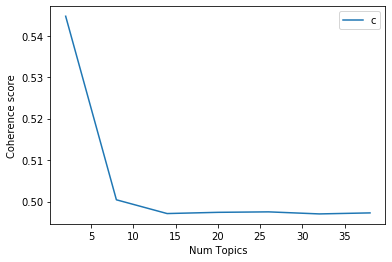

In [83]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [387]:
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()